Carga de librerias necesarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras import regularizers as reg
import altair as alt

Using TensorFlow backend.


In [2]:
datos = pd.read_csv('EnergyMolecule/roboBohr.csv')
datos.shape

(16242, 1278)

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1278 entries, Unnamed: 0 to Eat
dtypes: float64(1276), int64(2)
memory usage: 158.4 MB


In [4]:
datos.describe()

Unnamed: 0             0             1             2             3  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean    8139.041805    115.715266     22.445723     20.474191     18.529573   
std     4698.182820    113.198503      8.659586      7.670481      6.485777   
min        0.000000     36.858105      2.906146      0.000000      0.000000   
25%     4068.250000     73.516695     17.969345     16.228071     15.165862   
50%     8142.500000     73.516695     20.662511     18.631287     17.690729   
75%    12207.750000     73.516695     21.132432     20.739496     18.712895   
max    16272.000000    388.023441     73.563510     66.269180     66.268891   

                  4             5             6             7             8  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      17.169350     15.816888     15.133152     14.471534     13.960759   
std        5.512560      4.179691      3.885091      3.503075      3.357136   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.744092     13.653146     13.637784     12.759519     12.587359   
50%       16.020040     15.156646     13.848274     13.659233     13.652832   
75%       18.297501     17.639688     16.154918     15.499474     14.900585   
max       66.268756     66.268196     66.264158     66.258487     66.258177   

           ...               1267          1268          1269          1270  \
count      ...       16242.000000  16242.000000  16242.000000  16242.000000   
mean       ...           0.000134      0.000133      0.003879      0.000131   
std        ...           0.002728      0.002705      0.043869      0.002676   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           0.062225      0.061999      0.500000      0.061534   

               1271          1272          1273          1274    pubchem_id  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean       0.000129      0.002155      0.000127      0.001201  33107.484300   
std        0.002633      0.032755      0.002594      0.024472  23456.785147   
min        0.000000      0.000000      0.000000      0.000000      1.000000   
25%        0.000000      0.000000      0.000000      0.000000  12298.250000   
50%        0.000000      0.000000      0.000000      0.000000  27731.500000   
75%        0.000000      0.000000      0.000000      0.000000  55020.750000   
max        0.059760      0.500000      0.057834      0.500000  74980.000000   

                Eat  
count  16242.000000  
mean     -11.178969  
std        3.659133  
min      -23.245373  
25%      -13.475805  
50%      -10.835211  
75%       -8.623903  
max       -0.789513  

[8 rows x 1278 columns]

In [5]:
datos.head()

Unnamed: 0          0          1          2          3          4  \
0           0  73.516695  17.817765  12.469551  12.458130  12.454607   
1           1  73.516695  20.649126  18.527789  17.891535  17.887995   
2           2  73.516695  17.830377  12.512263  12.404775  12.394493   
3           3  73.516695  17.875810  17.871259  17.862402  17.850920   
4           4  73.516695  17.883818  17.868256  17.864221  17.818540   

           5          6          7          8    ...      1267  1268  1269  \
0  12.447345  12.433065  12.426926  12.387474    ...       0.0   0.0   0.5   
1  17.871731  17.852586  17.729842  15.864270    ...       0.0   0.0   0.0   
2  12.391564  12.324461  12.238106  10.423249    ...       0.0   0.0   0.0   
3  17.850440  12.558105  12.557645  12.517583    ...       0.0   0.0   0.0   
4  12.508657  12.490519  12.450098  10.597068    ...       0.0   0.0   0.0   

   1270  1271  1272  1273  1274  pubchem_id        Eat  
0   0.0   0.0   0.0   0.0   0.0       25004 -19.013763  
1   0.0   0.0   0.0   0.0   0.0       25005 -10.161019  
2   0.0   0.0   0.0   0.0   0.0       25006  -9.376619  
3   0.0   0.0   0.0   0.0   0.0       25009 -13.776438  
4   0.0   0.0   0.0   0.0   0.0       25011  -8.537140  

[5 rows x 1278 columns]

Se elimina datos que no aportan a la red, en particular se elimino un indice, y un id, son valores que no estan vinculados a mediciones del modelo que queremos construir.

In [6]:
datos.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
n_test=0 #utilizado para indicar el numero de pruebas (indice) realizada
cvscores=[]

a.1 Normalización de los datos

Se aconseja la normalización de los datos porque la mayoría de las funciones de activación de la red se comportan de una manera adecuada en los rangos [0,1]

In [7]:
total=len(datos)
perc_60=int(total*0.6)
perc_85=int(total*0.85)

In [8]:
df_train=datos[:perc_60]
df_val=datos[perc_60:perc_85]
df_test=datos[perc_85:]

In [9]:
scaler = StandardScaler().fit(df_train)

In [10]:
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_val_scaled =  pd.DataFrame(scaler.transform(df_val),columns=df_val.columns)
X_test_scaled =  pd.DataFrame(scaler.transform(df_test),columns=df_test.columns)

In [11]:
#y_train = df_train.pop('Eat').values.reshape(-1,1)
#y_val = df_val.pop('Eat').values.reshape(-1,1)
y_train_scaled = X_train_scaled.pop('Eat').values.reshape(-1,1)
y_val_scaled = X_val_scaled.pop('Eat').values.reshape(-1,1)

In [12]:
#X_train_scaled.drop(columns=['Eat'],axis=1,inplace=True)
#X_val_scaled.drop(columns=['Eat'],axis=1,inplace=True)
X_test_scaled.drop(columns=['Eat'],axis=1,inplace=True)

b. Gráfico de error cuadrático medio (SGD) con Sigmoide

In [13]:
def plot_chart(history, n_test, var_activation, subtitle):
    plt.rcParams["figure.figsize"] = [12,4]
    train_loss=history.history['loss']
    test_loss=history.history['val_loss']
    plt.subplot(1,2,1)
    plt.plot(train_loss)
    plt.plot(test_loss)
    n_test=n_test+1
    plt.title('MODEL LOSS, test #'+str(n_test)+'\n'+
              str.capitalize(var_activation)+', '+subtitle)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    
    plt.subplot(1,2,2)
    min_v=0
    max_v=np.max(train_loss)
    plt.title('TRAIN VS TEST, test #'+str(n_test)+'\n'+
              str.capitalize(var_activation)+', '+subtitle)
    plt.xlabel('train')
    plt.ylabel('test')
    plt.grid()
    plt.plot([0,max_v], [0,max_v], color='red', linewidth=0.5)
    plt.scatter(train_loss,test_loss)
    plt.xlim(0,max_v)
    plt.ylim(0,max_v)
    plt.show()

In [17]:
#Función que agrupa la compilación y gráfica del modelo para reuso, donde
#var_lr = learning rate
#var_epochs = numero de epochs
#var_activation = función de activación para la capa oculta
#title = titulo del gráfico
#var_lear_decay = factor lear decay
#var_batch_size = tamaño del batch
#var_optimizer = optimizador del modelo:
#    1: SGD (default)
#    2: Adam
#    3: RMSprop
#    4: Adagrad
#    5: Adadelta
#var_reg_1 = regularizador l_1
#var_reg_2 = regularizador l_2
#var_dropout = DropOut
#var_verbose = verbose del proceso de ajuste

def run_model(var_lr=0.01,
              var_activation="sigmoid",
              subtitle=None,
              var_lear_decay=0.0,
              var_batch_size=None,
              var_optimizer=1,
              var_reg_1=reg.l1(0.0),
              var_reg_2=reg.l1(0.0),
              var_dropout=0,
              var_verbose=0,
              Xm_train=[],
              ym_train=[],
              Xm_val=[],
              ym_val=[]):
    epochs = 250
    global n_test, cvscores, history
    global X_train_scaled, y_train_scaled
    global X_val_scaled, y_val_scaled
    n_test=n_test+1
    if len(Xm_train) > 0:
        X_train_scaled = Xm_train
        y_train_scaled = ym_train
        X_val_scaled = Xm_val
        y_val_scaled = ym_val

    model = Sequential()
    model.add(
        Dense(
            256,
            input_dim=X_train_scaled.shape[1],
            kernel_initializer='uniform',
            kernel_regularizer=var_reg_1,
            activation=var_activation))
    model.add(Dropout(var_dropout))
    model.add(
        Dense(
            1,
            kernel_initializer='uniform',
            kernel_regularizer=var_reg_2,
            activation='linear'))
    if var_optimizer == 1:
        opt = SGD(lr=var_lr, decay=var_lear_decay)
    if var_optimizer == 2:
        opt = Adam(lr=var_lr)
    if var_optimizer == 3:
        opt = RMSprop(lr=var_lr)
    if var_optimizer == 4:
        opt = Adagrad(lr=var_lr)
    if var_optimizer == 5:
        opt = Adadelta(lr=var_lr)
    model.compile(optimizer=opt, loss='mean_squared_error')
    history = model.fit(
        X_train_scaled,
        y_train_scaled,
        batch_size=var_batch_size,
        epochs=epochs,
        verbose=var_verbose,
        #batch_size=X_train_scaled.shape[0],
        validation_data=(X_val_scaled, y_val_scaled))
    
    if np.isnan(history.history['loss']).any() or np.isnan(history.history['val_loss']).any():
        print('Estadística NULA para '+subtitle+'('+var_activation+','+str(n_test)+')')
    else:
        if len(Xm_train) > 0:
            scores = model.evaluate(X_val_scaled, y_val_scaled, verbose=1)
            cvscores.append(scores)
        plot_chart(history, n_test, var_activation, subtitle)

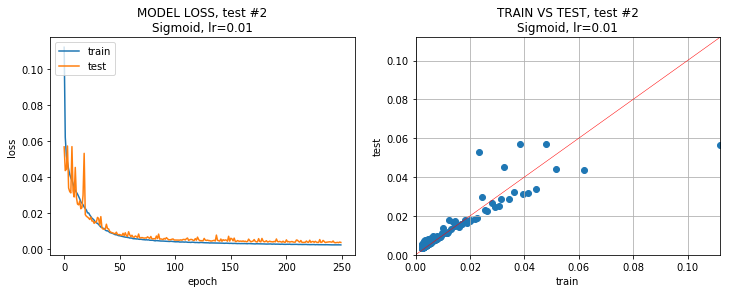

In [15]:
run_model(subtitle='lr=0.01')

Existe divergencia pero con mayor notoriedad para las primeras iteraciones (epochs), en la medida que se corre mas veces el experimento el modelo tiende a estabilizarse.

c. Grafico SGD con ReLU

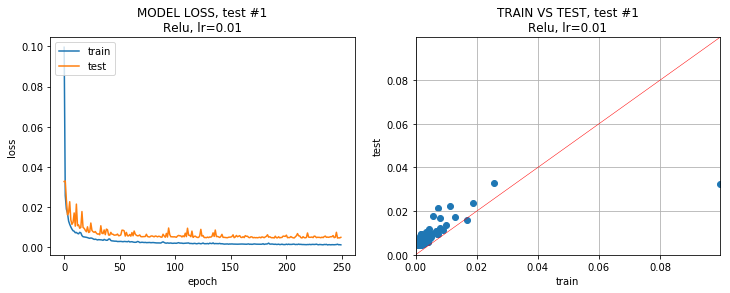

In [37]:
run_model(subtitle='lr=0.01', var_activation='relu')

En este caso se produce un peor ajuste, el test demuestra que la red no cumple mejor su cometido.

d. ciclo variando Learning Rate con Sigmoide y ReLU

Se produce divergencia en varios de los experimentos, es claro que el learning rate influye de manera notoria en el resultado, produciendo mayor divergencia en algunos de los casos observados.

In [18]:
n_lr=20
learn_rate=np.linspace(0.0,0.05,n_lr)

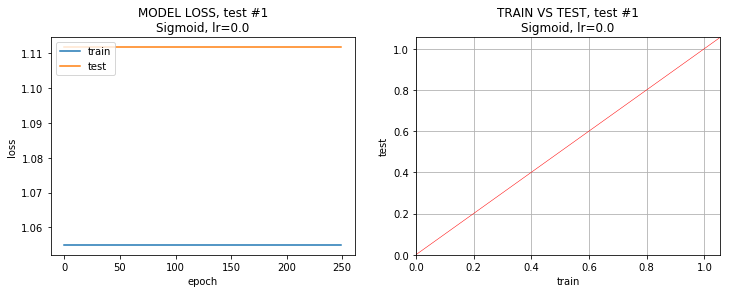

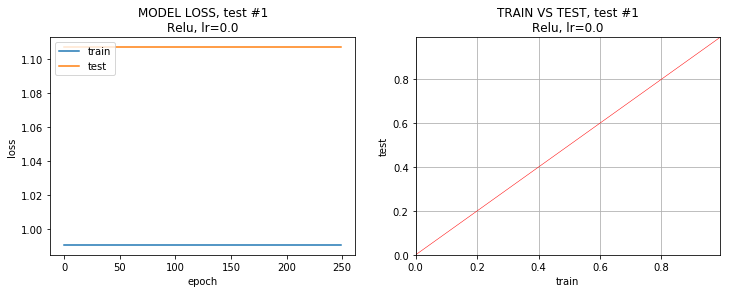

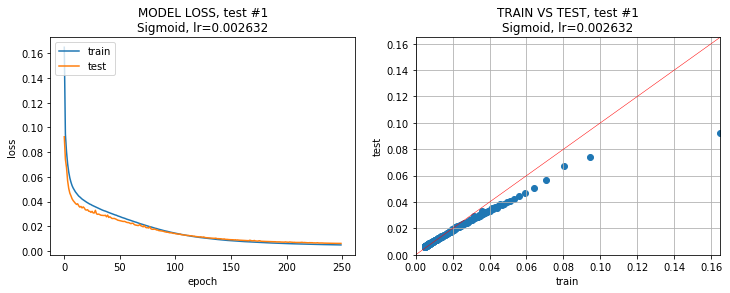

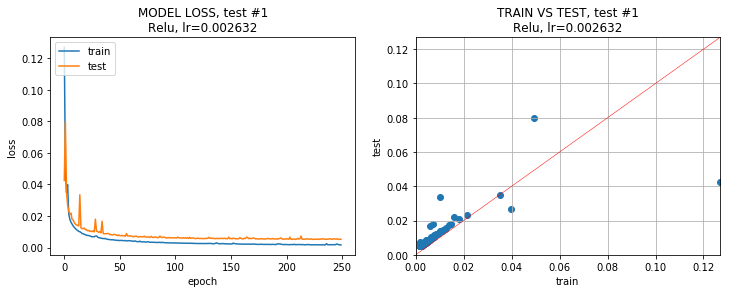

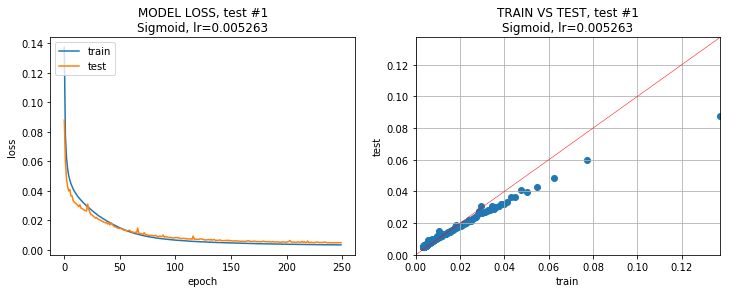

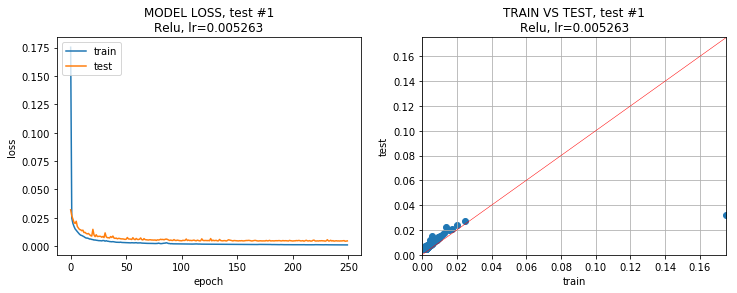

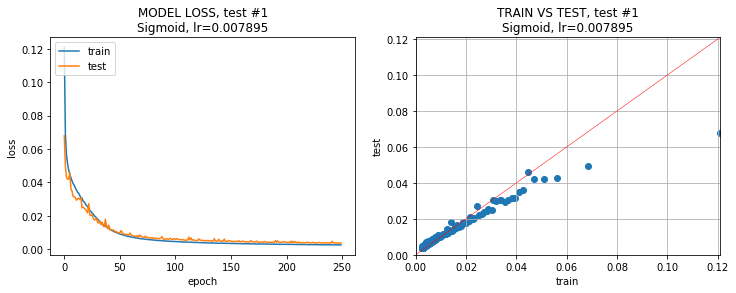

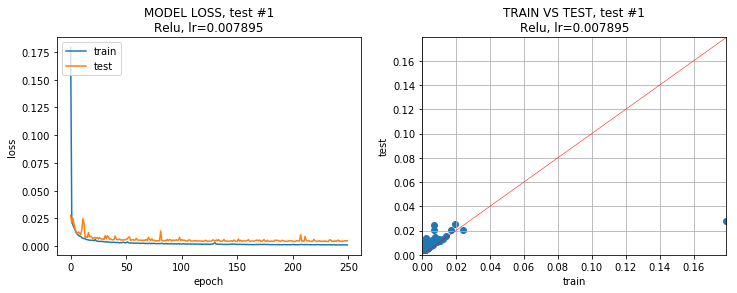

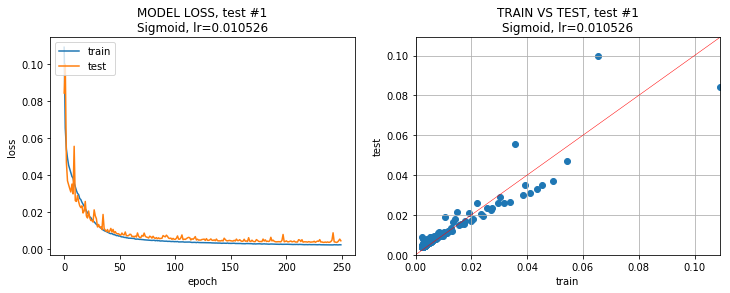

Estadística NULA para lr=0.010526(relu,0)


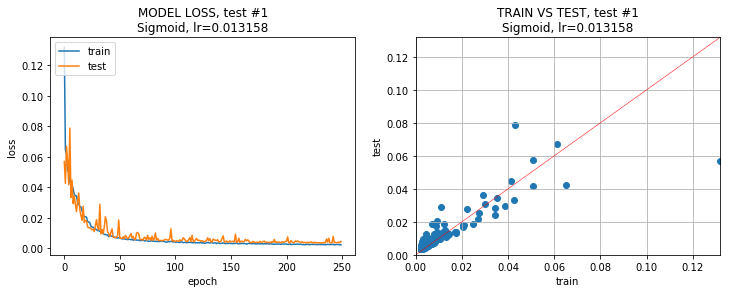

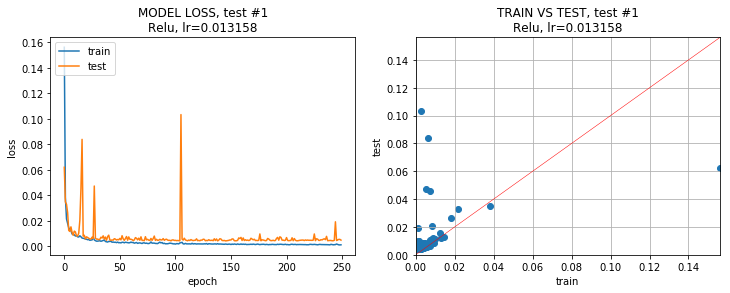

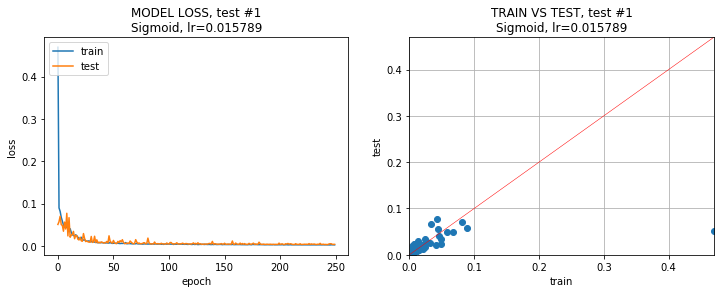

Estadística NULA para lr=0.015789(relu,0)


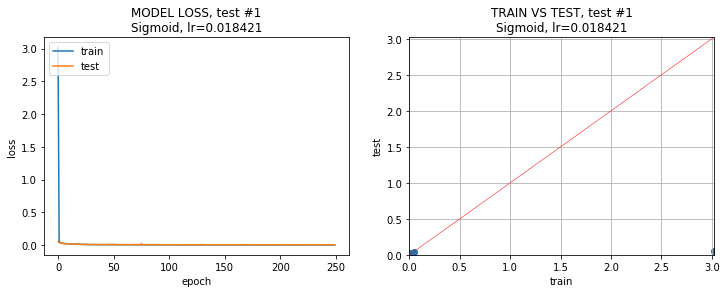

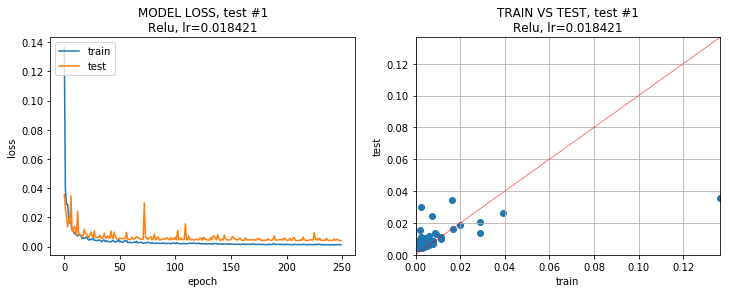

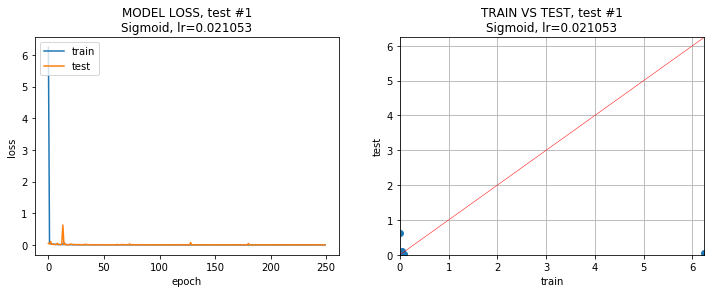

Estadística NULA para lr=0.021053(relu,0)


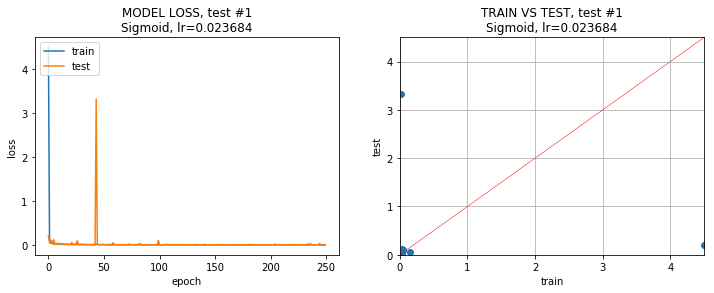

Estadística NULA para lr=0.023684(relu,0)


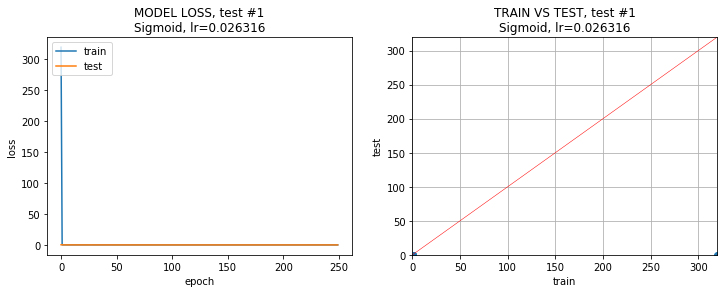

Estadística NULA para lr=0.026316(relu,0)
Estadística NULA para lr=0.028947(sigmoid,0)
Estadística NULA para lr=0.028947(relu,0)
Estadística NULA para lr=0.031579(sigmoid,0)
Estadística NULA para lr=0.031579(relu,0)
Estadística NULA para lr=0.034211(sigmoid,0)
Estadística NULA para lr=0.034211(relu,0)
Estadística NULA para lr=0.036842(sigmoid,0)
Estadística NULA para lr=0.036842(relu,0)
Estadística NULA para lr=0.039474(sigmoid,0)
Estadística NULA para lr=0.039474(relu,0)
Estadística NULA para lr=0.042105(sigmoid,0)
Estadística NULA para lr=0.042105(relu,0)
Estadística NULA para lr=0.044737(sigmoid,0)
Estadística NULA para lr=0.044737(relu,0)
Estadística NULA para lr=0.047368(sigmoid,0)
Estadística NULA para lr=0.047368(relu,0)
Estadística NULA para lr=0.05(sigmoid,0)
Estadística NULA para lr=0.05(relu,0)


In [19]:
for lr in learn_rate:
    run_model(var_lr=lr,
              subtitle='lr='+str(round(lr,6)))
    run_model(var_lr=lr,var_activation='relu',
              subtitle='lr='+str(round(lr,6)))

e. ciclo variando decay con Sigmoide y ReLU

El learn decay ayuda a mejorar la convergencia, pero en valores bajos, al ir aumentando la red tiende a diverger facilmente.

In [20]:
n_decay=10
lear_decay=np.logspace(-6.0,0.0,n_decay)

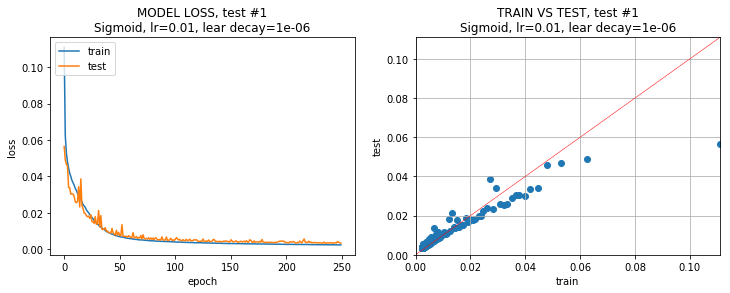

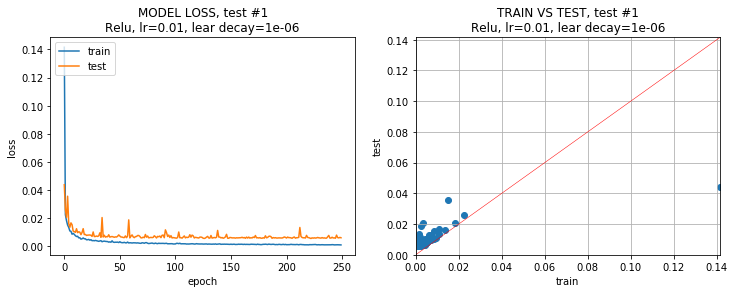

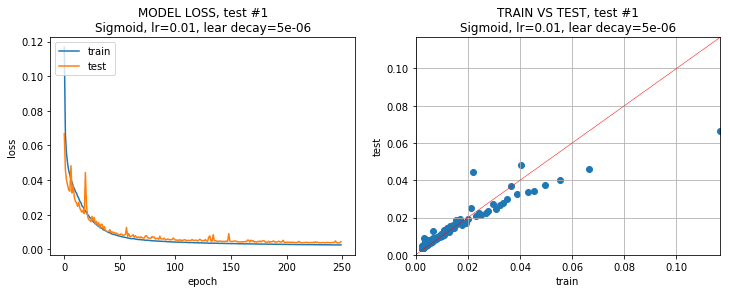

Estadística NULA para lr=0.01, lear decay=5e-06(relu,0)


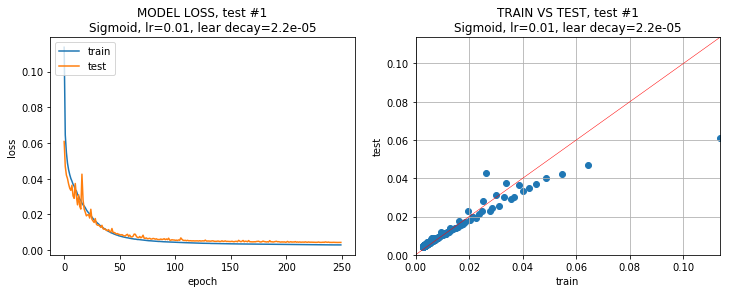

Estadística NULA para lr=0.01, lear decay=2.2e-05(relu,0)


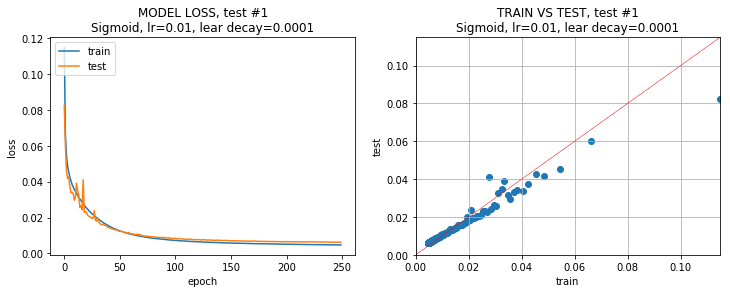

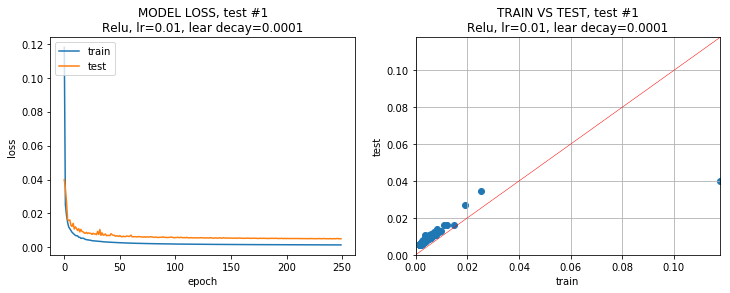

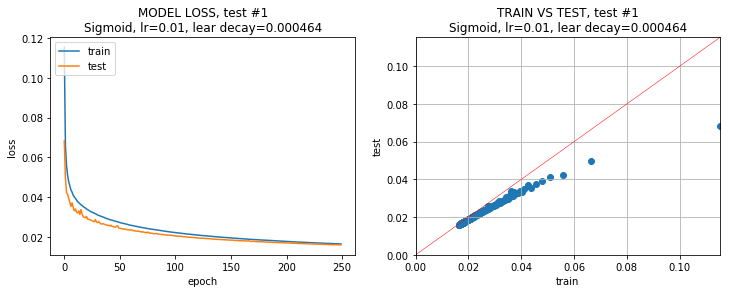

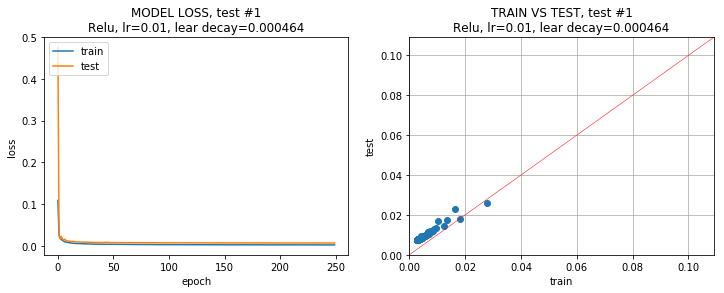

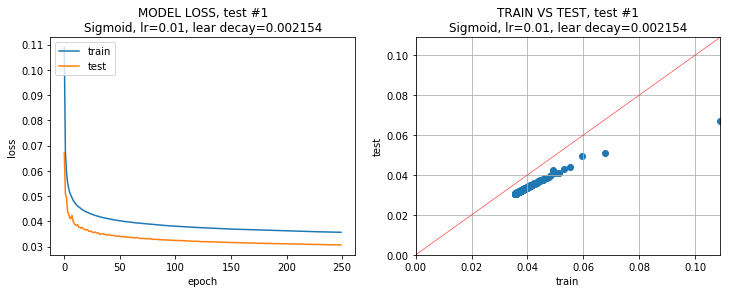

Estadística NULA para lr=0.01, lear decay=0.002154(relu,0)


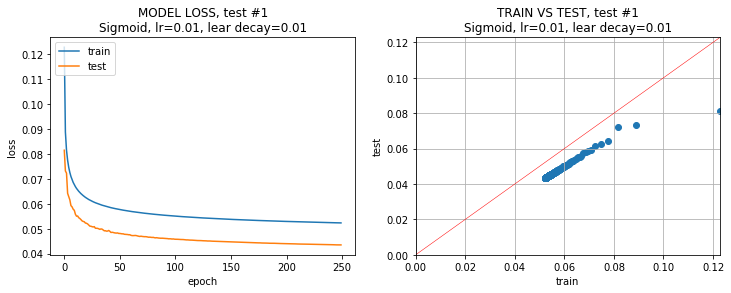

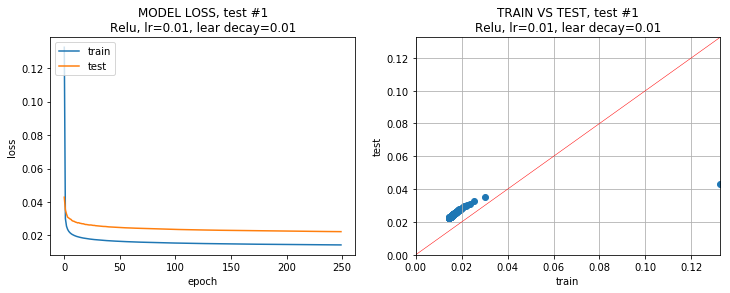

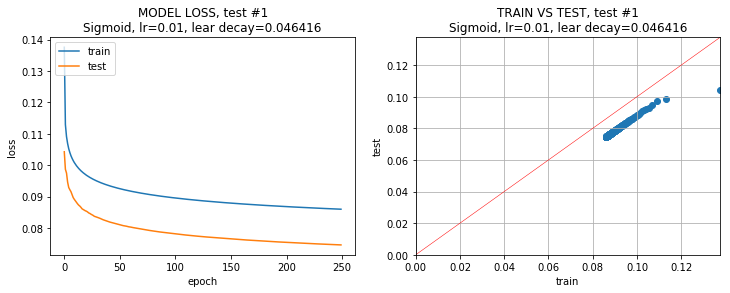

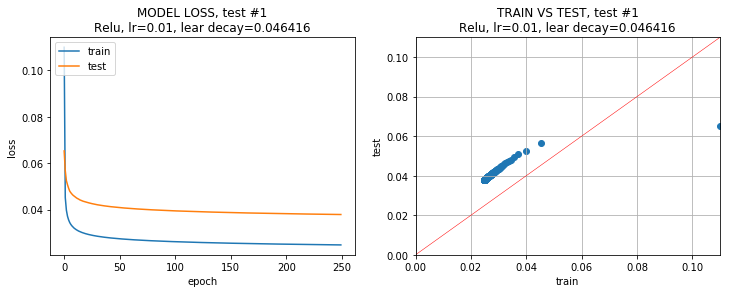

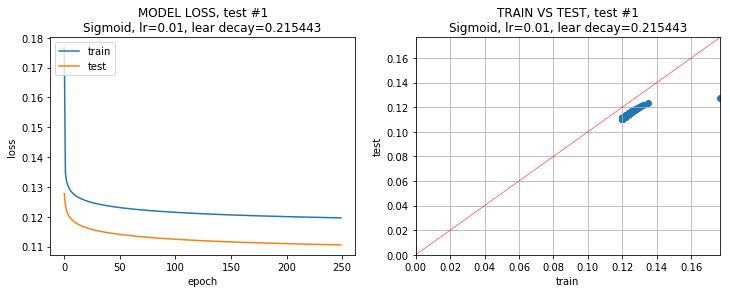

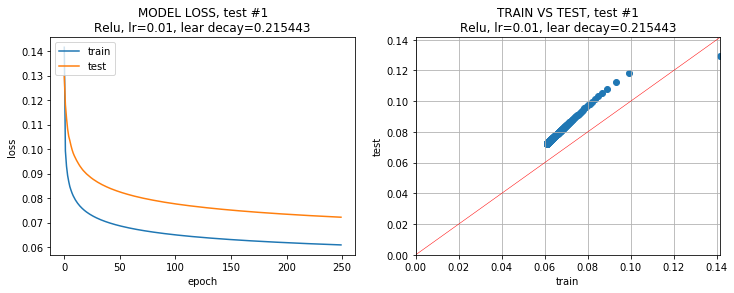

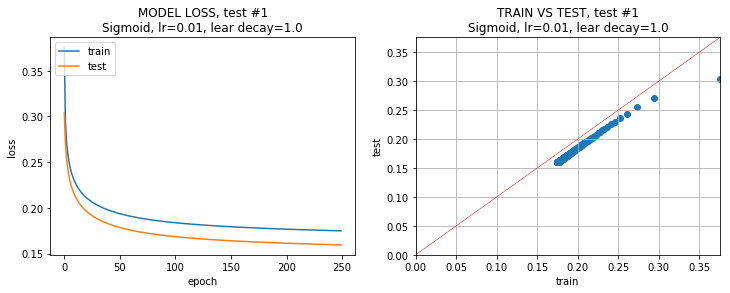

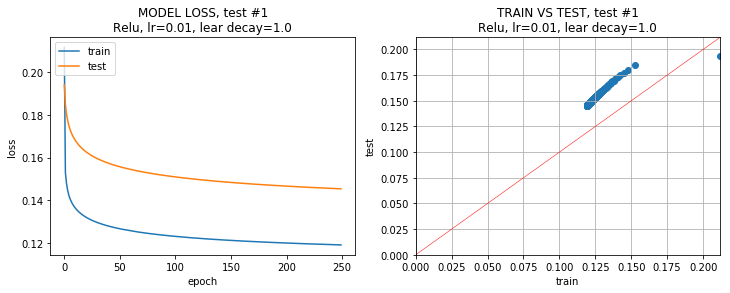

In [21]:
for ld in lear_decay:
    run_model(var_lear_decay=ld,
              subtitle='lr=0.01, lear decay='+
              str(round(ld,6)))
    run_model(var_activation='relu',
          var_lear_decay=ld,
          subtitle='lr=0.01, lear decay='+
          str(round(ld,6)))

f. ciclo utilizando mini-batches con Sigmoide y ReLU

El uso de mini-batches mejora el rendimiento de la red, su utilización en valores adecuados permite obtener una llegada de convergencia mas rapida, sin embargo podria ayudar al sobreajuste.

In [35]:
n_batches=10
batch_sizes=np.int16(np.linspace(1,X_train_scaled.shape[0],n_batches))

1
Estadística NULA para lr=0.01, batch size=1(sigmoid,0)
Estadística NULA para lr=0.01, batch size=1(relu,0)
1083


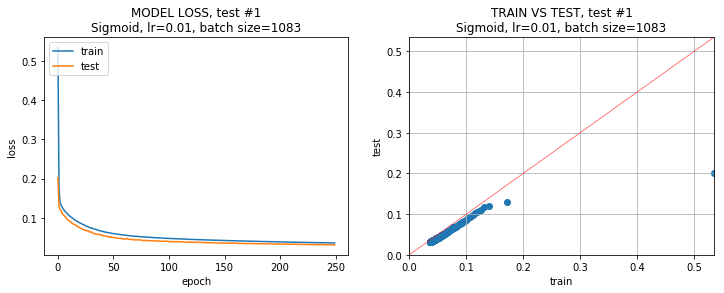

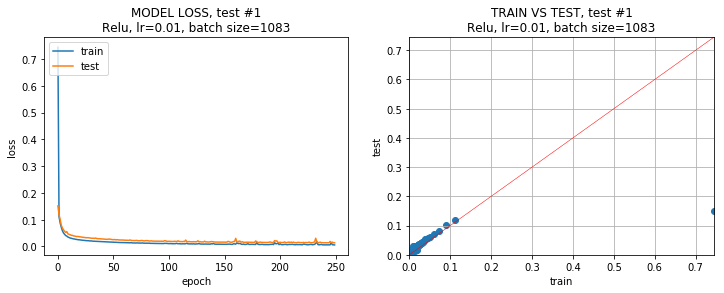

2166


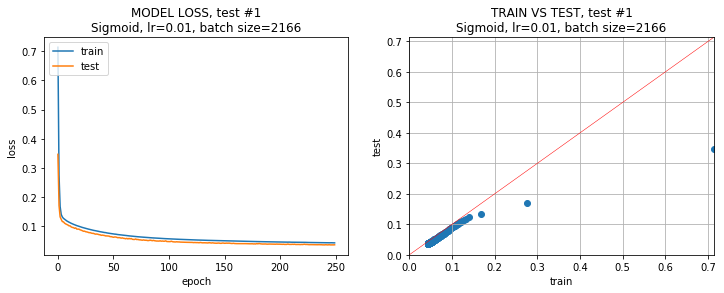

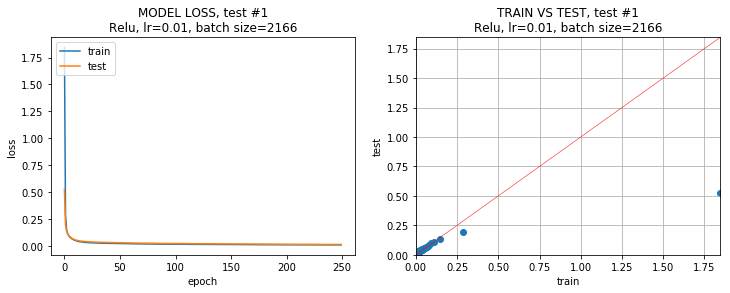

3249


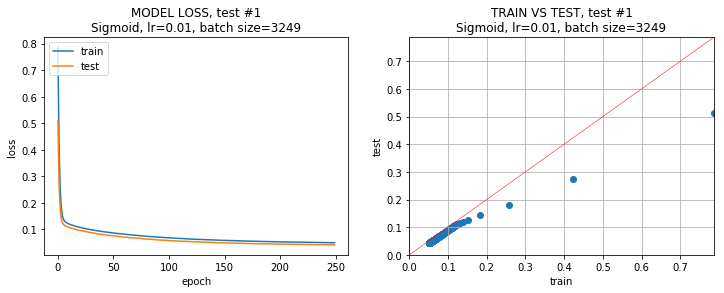

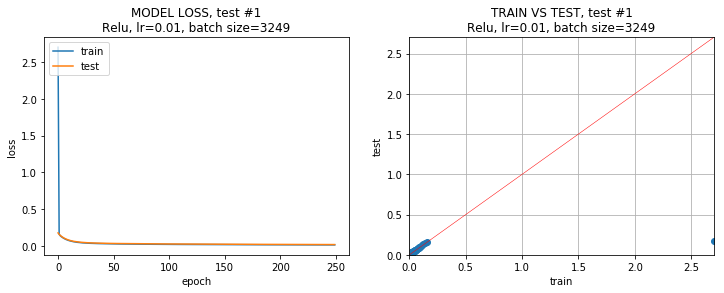

4331


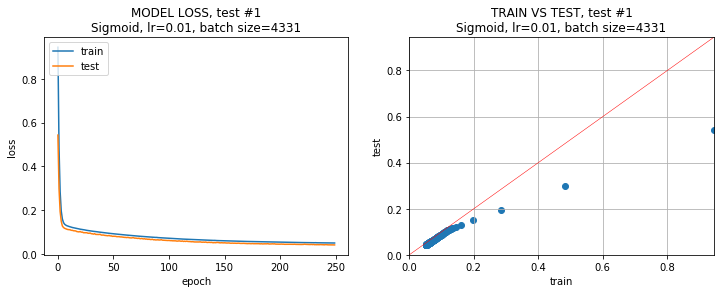

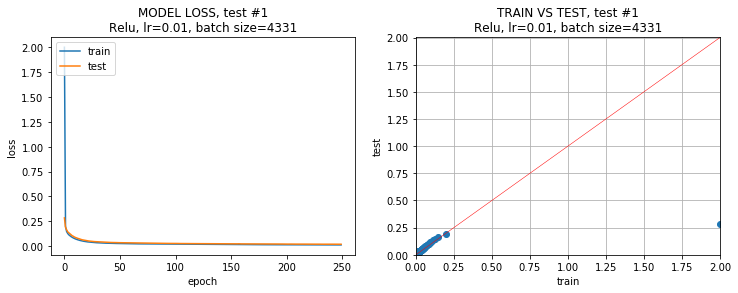

5414


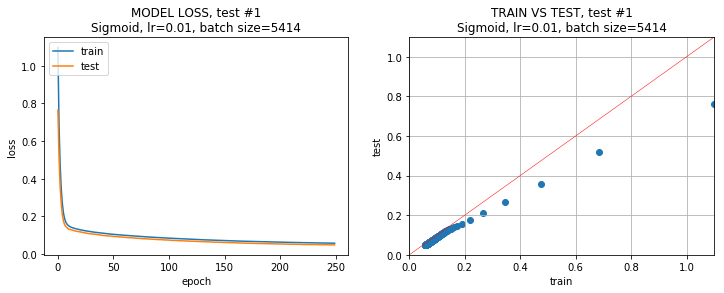

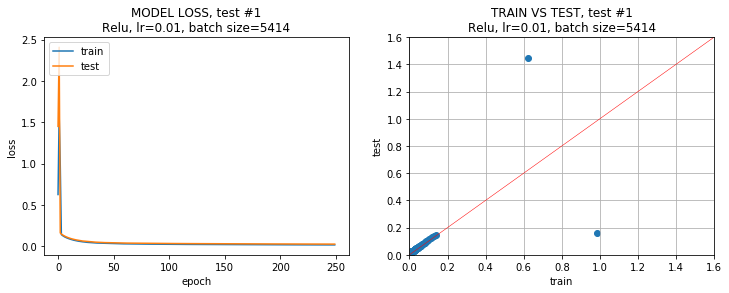

6497


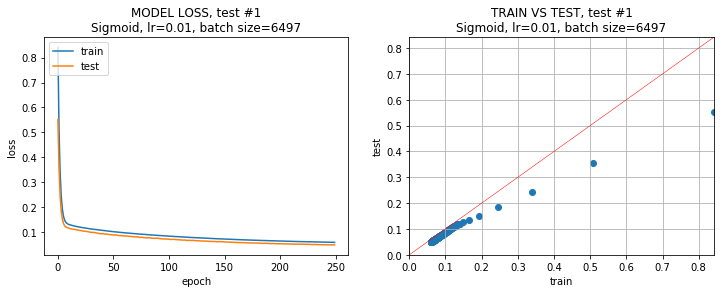

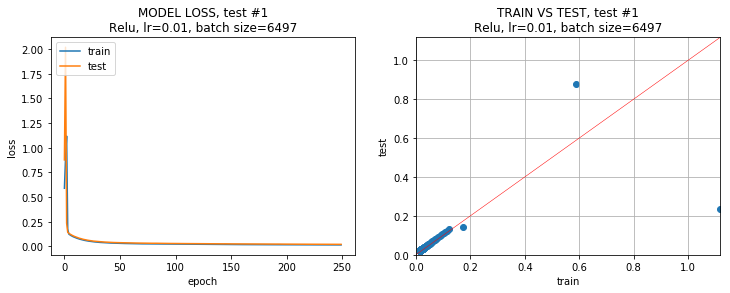

7579


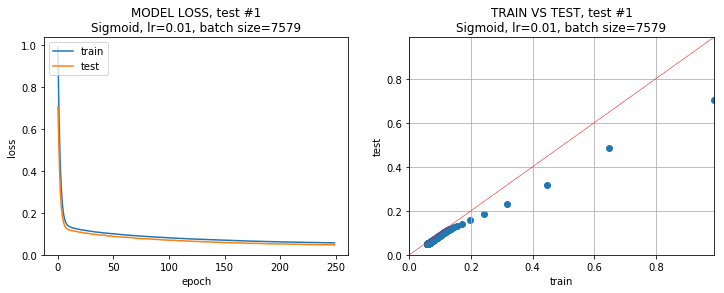

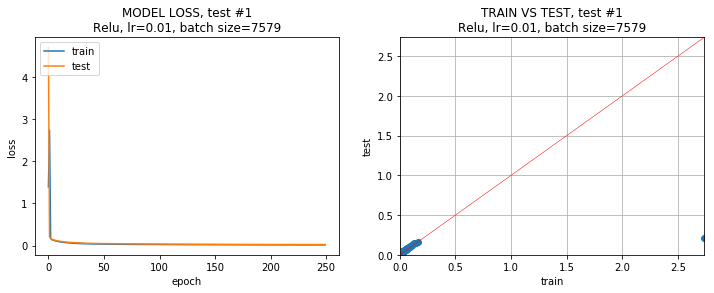

8662


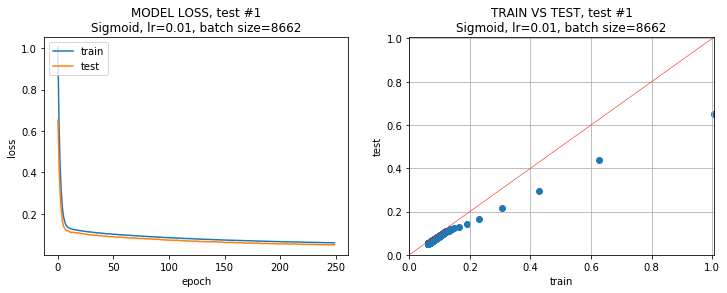

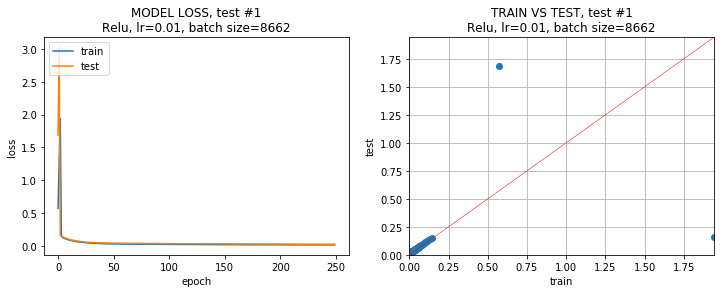

9745


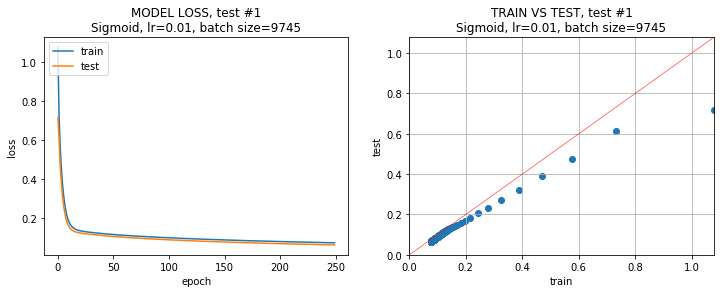

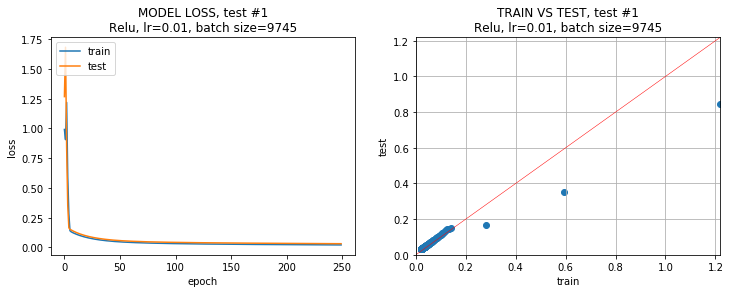

In [36]:
for bs in batch_sizes:
    print(bs)
    run_model(var_batch_size=bs,
              subtitle='lr=0.01, batch size='+
              str(round(bs,6)))
    run_model(var_activation='relu',
          var_batch_size=bs,
          subtitle='lr=0.01, batch size='+
          str(round(bs,6)))

In [37]:
#g. Pruebas usando SGD, Adam, RMSprop, Adagrad, Adadelta 
#(en funciones de activación Sigmoide y ReLU)

En el experimento usando las distintas estrategias se ve un mejor comportamiento en las SGD, Adagrad y Adadelta. Produciendo Adagrad la mejor  velocidad de convergencia.

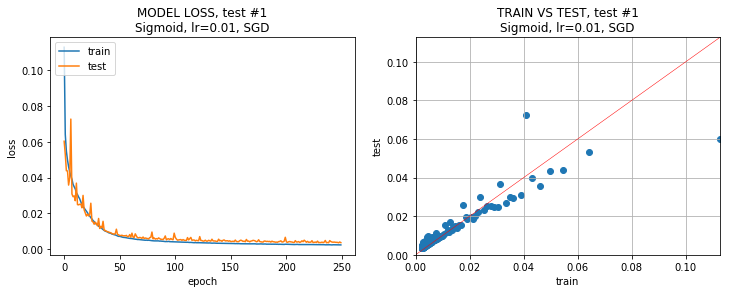

Estadística NULA para lr=0.01, SGD(relu,0)


In [38]:
run_model(subtitle='lr=0.01, SGD')
run_model(var_activation='relu',subtitle='lr=0.01, SGD')

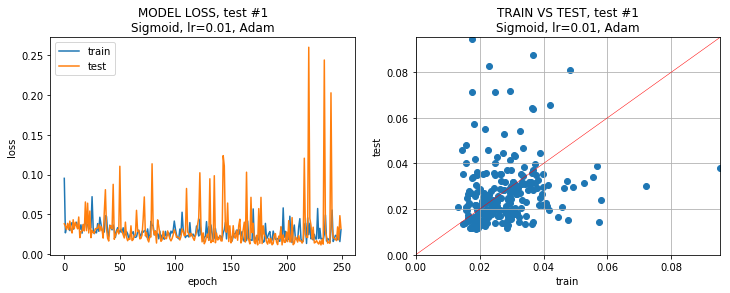

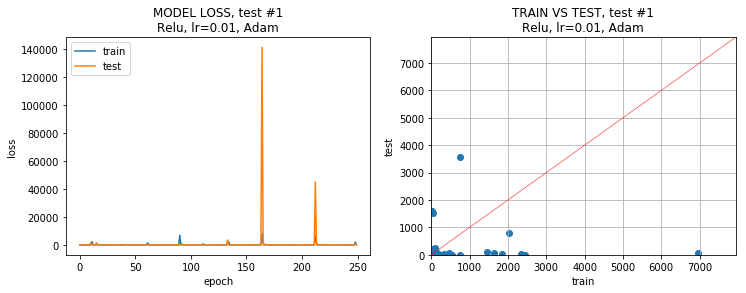

In [39]:
run_model(var_optimizer=2,subtitle='lr=0.01, Adam')
run_model(var_activation='relu',var_optimizer=2,subtitle='lr=0.01, Adam')

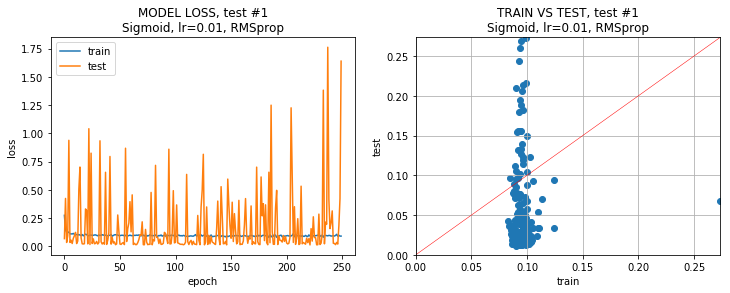

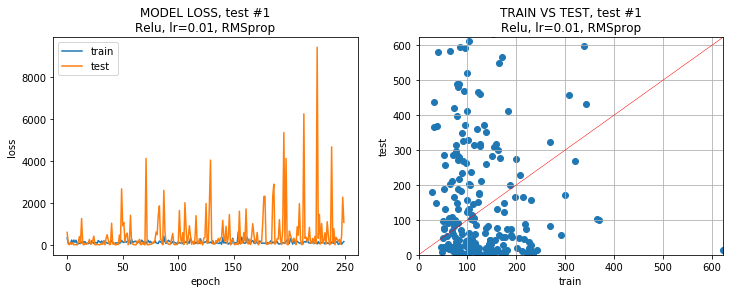

In [40]:
run_model(var_optimizer=3,subtitle='lr=0.01, RMSprop')
run_model(var_activation='relu',var_optimizer=3,subtitle='lr=0.01, RMSprop')

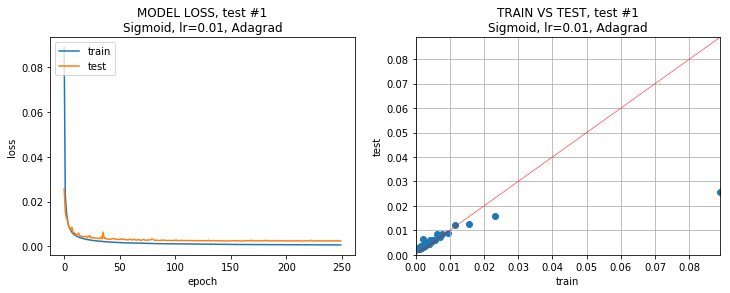

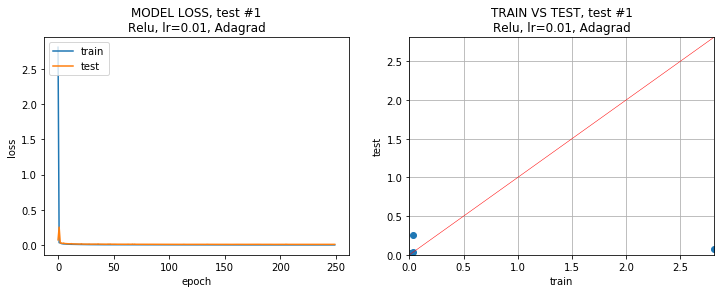

In [41]:
run_model(var_optimizer=4,subtitle='lr=0.01, Adagrad')
run_model(var_activation='relu',var_optimizer=4,subtitle='lr=0.01, Adagrad')

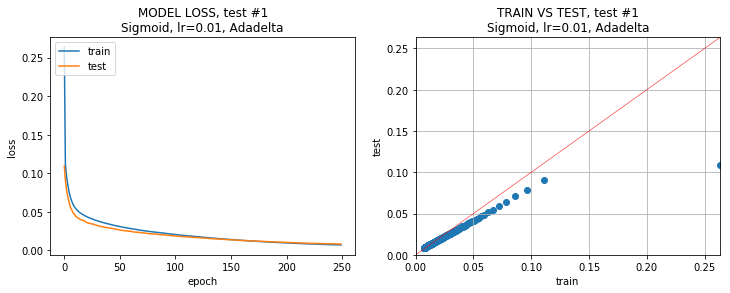

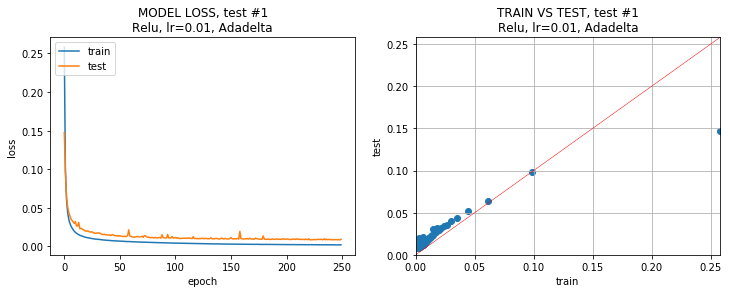

In [42]:
run_model(var_optimizer=5,subtitle='lr=0.01, Adadelta')
run_model(var_activation='relu',var_optimizer=5,subtitle='lr=0.01, Adadelta')

h. Pruebas usando regularizadores

Se observo un mejor comportamiento de la red con el uso del regularizador L2, en particular para valores cercanos a 0.01.

In [43]:
n_params=5
params=np.linspace(0,0.05,n_params)

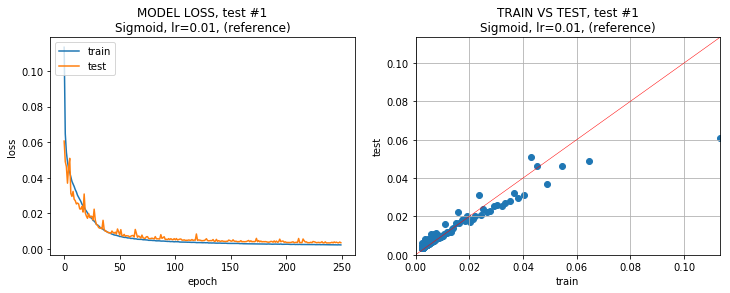

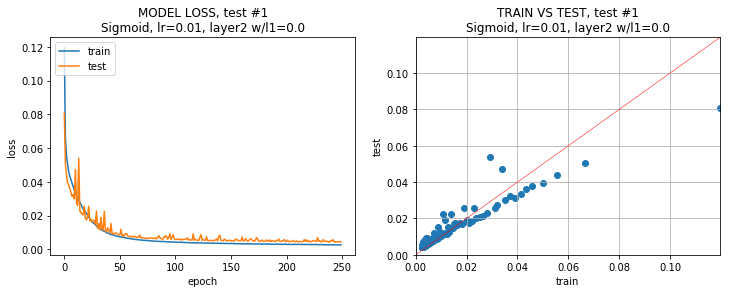

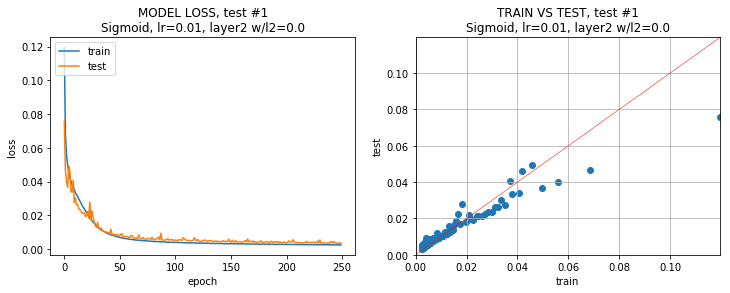

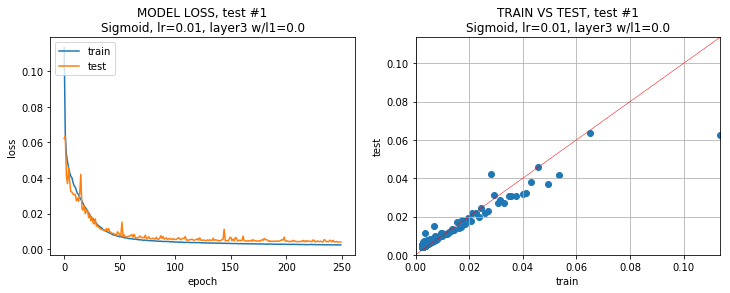

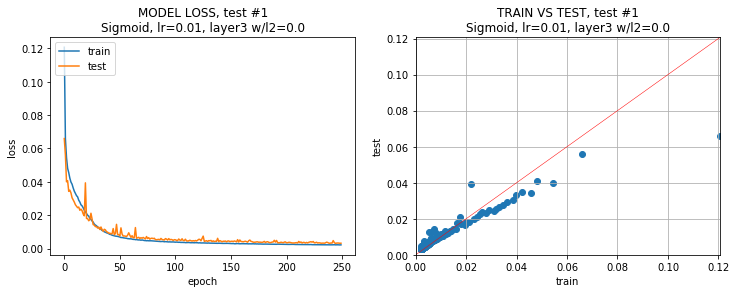

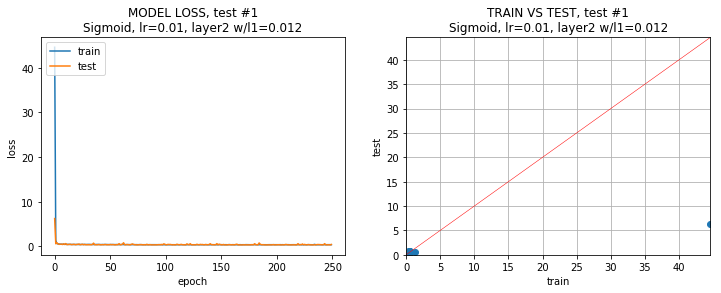

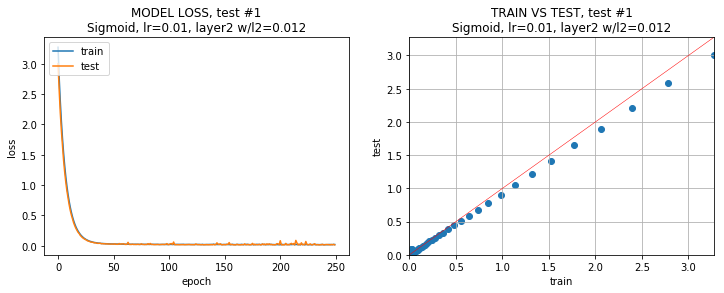

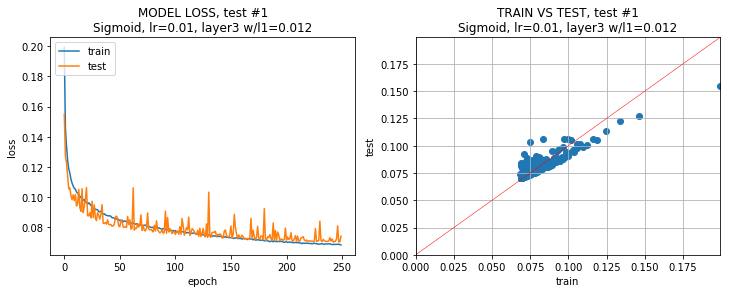

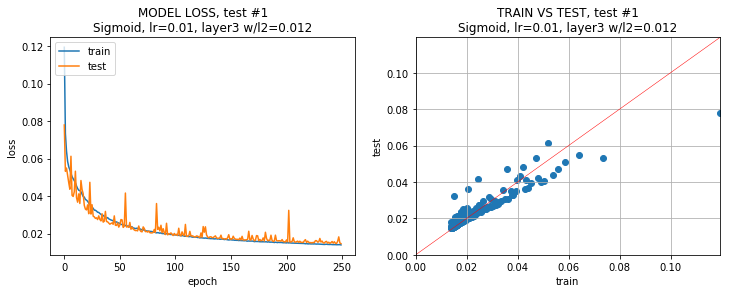

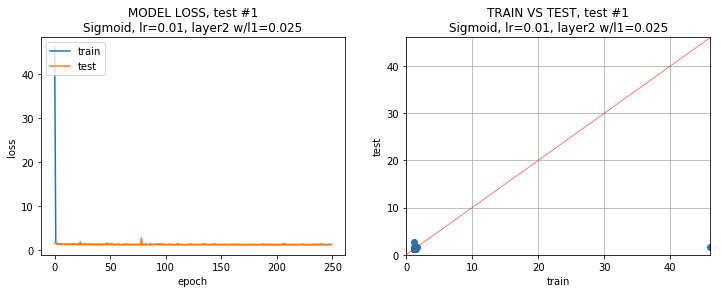

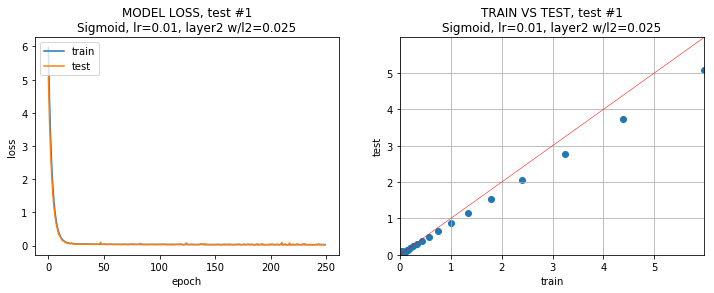

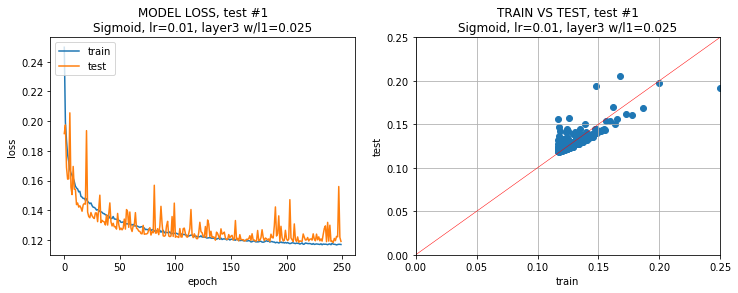

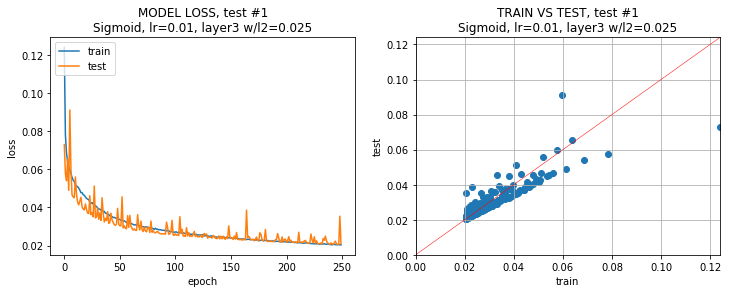

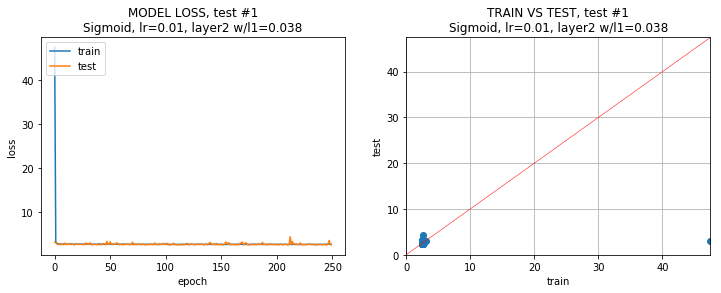

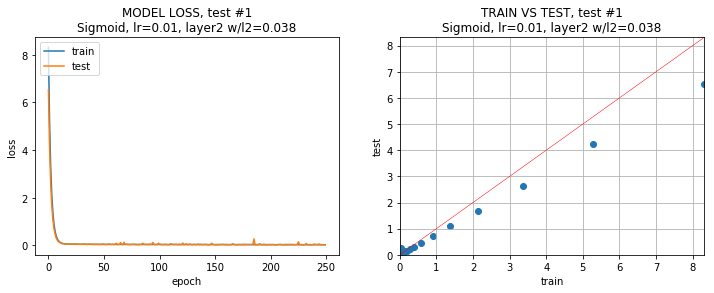

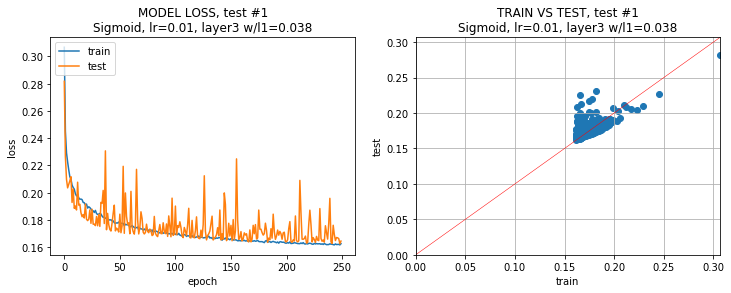

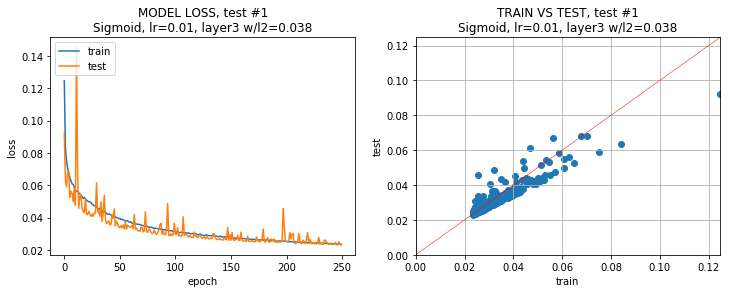

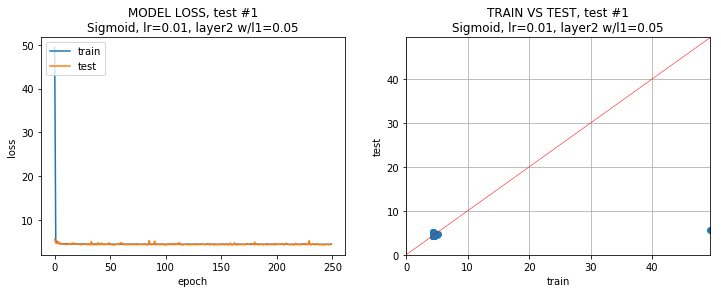

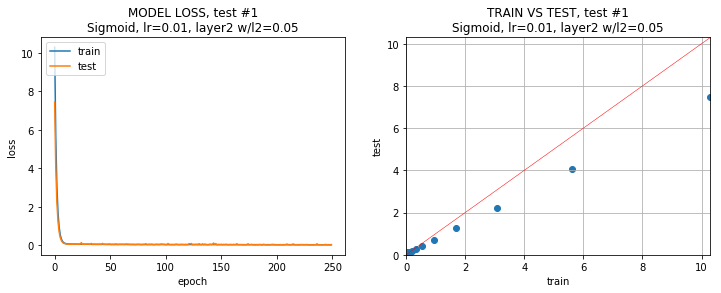

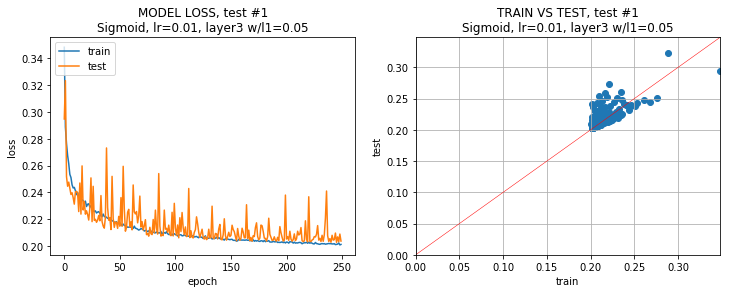

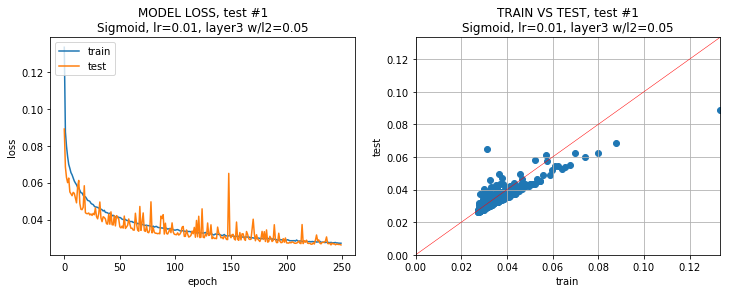

In [44]:
run_model(subtitle='lr=0.01, (reference)')
for p in params:
    run_model(var_reg_1=reg.l1(p),
              subtitle='lr=0.01, layer2 w/l1='+str(round(p,3)))
    run_model(var_reg_1=reg.l2(p),
              subtitle='lr=0.01, layer2 w/l2='+str(round(p,3)))
    run_model(var_reg_2=reg.l1(p),
              subtitle='lr=0.01, layer3 w/l1='+str(round(p,3)))
    run_model(var_reg_2=reg.l2(p),
              subtitle='lr=0.01, layer3 w/l2='+str(round(p,3)))

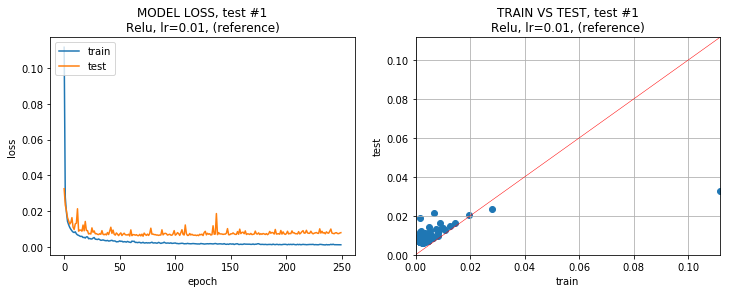

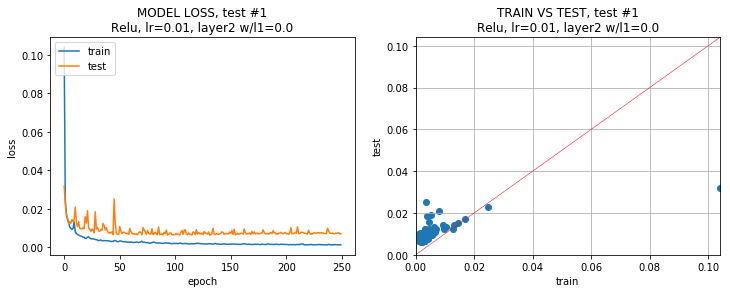

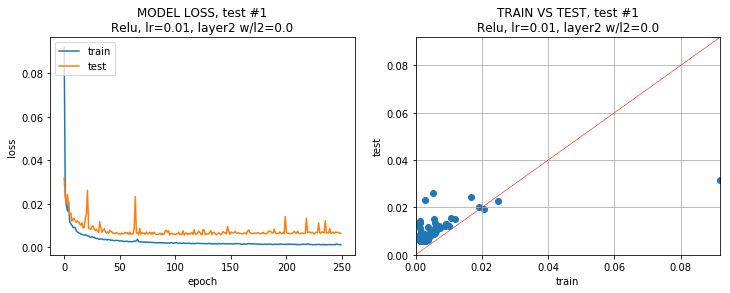

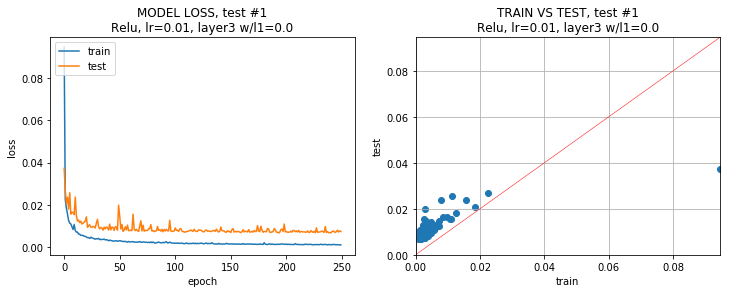

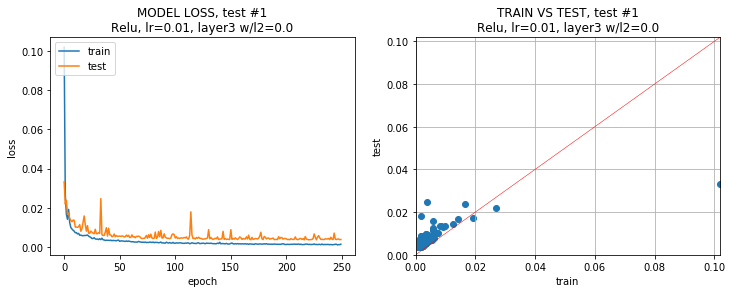

Estadística NULA para lr=0.01, layer2 w/l1=0.012(relu,0)
Estadística NULA para lr=0.01, layer2 w/l2=0.012(relu,0)


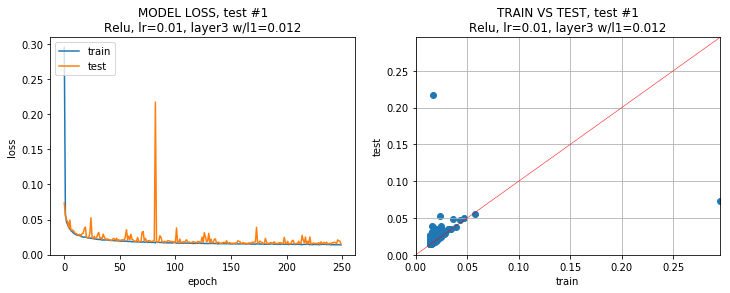

Estadística NULA para lr=0.01, layer3 w/l2=0.012(relu,0)
Estadística NULA para lr=0.01, layer2 w/l1=0.025(relu,0)
Estadística NULA para lr=0.01, layer2 w/l2=0.025(relu,0)


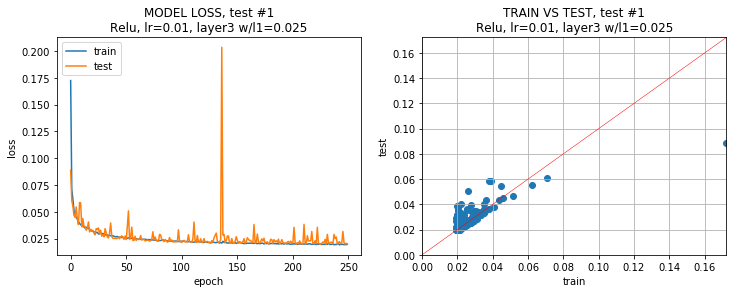

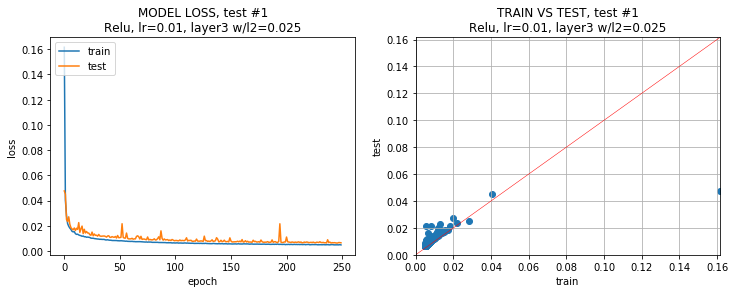

Estadística NULA para lr=0.01, layer2 w/l1=0.038(relu,0)


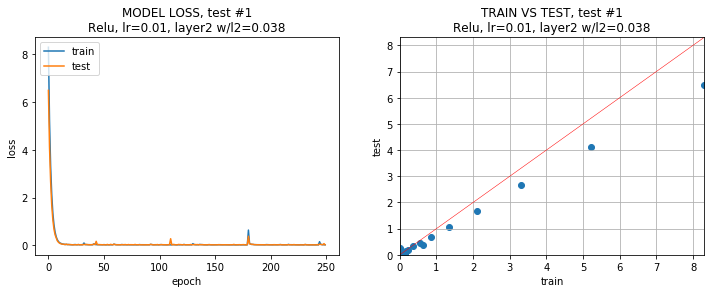

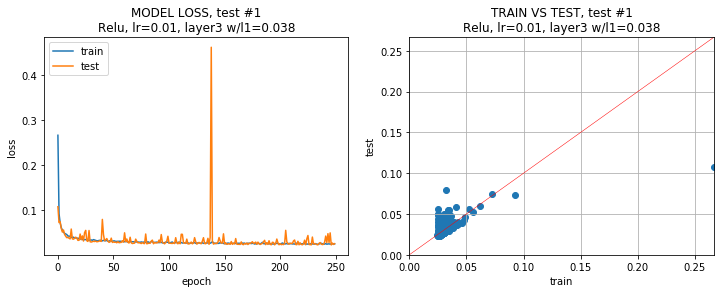

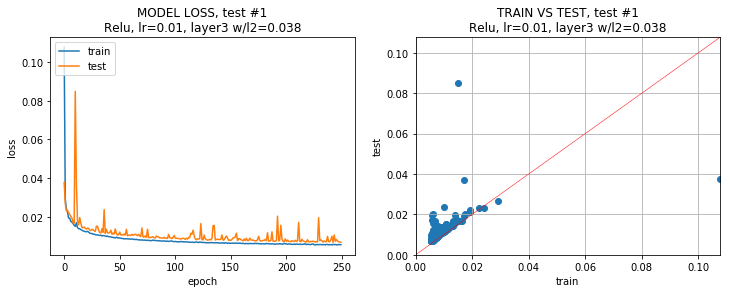

Estadística NULA para lr=0.01, layer2 w/l1=0.05(relu,0)
Estadística NULA para lr=0.01, layer2 w/l2=0.05(relu,0)


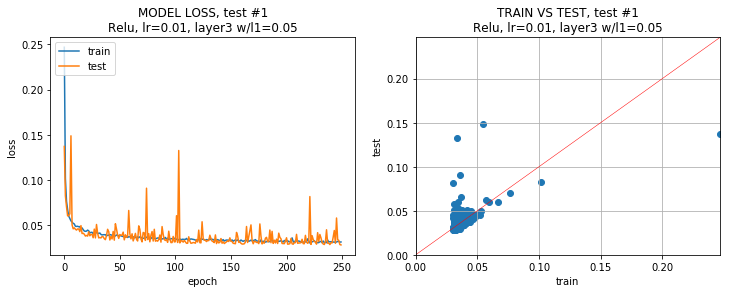

Estadística NULA para lr=0.01, layer3 w/l2=0.05(relu,0)


In [45]:
run_model(var_activation='relu',subtitle='lr=0.01, (reference)')
for p in params:
    run_model(var_activation='relu',var_reg_1=reg.l1(p),
              subtitle='lr=0.01, layer2 w/l1='+str(round(p,3)))
    run_model(var_activation='relu',var_reg_1=reg.l2(p),
              subtitle='lr=0.01, layer2 w/l2='+str(round(p,3)))
    run_model(var_activation='relu',var_reg_2=reg.l1(p),
              subtitle='lr=0.01, layer3 w/l1='+str(round(p,3)))
    run_model(var_activation='relu',var_reg_2=reg.l2(p),
              subtitle='lr=0.01, layer3 w/l2='+str(round(p,3)))




i. Pruebas usando dropouts

Los distintos experimentos con Dropout mostraron un mejor comportamiento para los datos de validación, pero una menor estabilidad en la convergencia en el modelo con Sigmoide vs ReLU.

In [46]:
n_params=10
params=np.linspace(0.0,1.0,n_params)

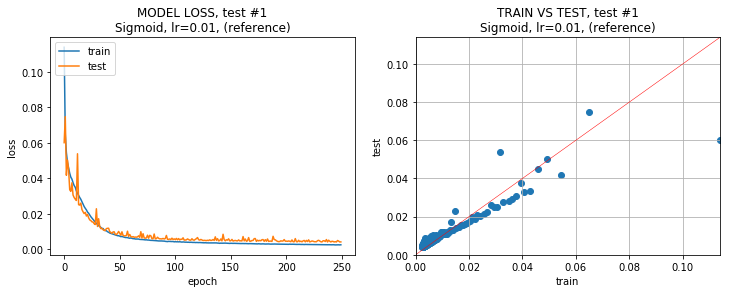

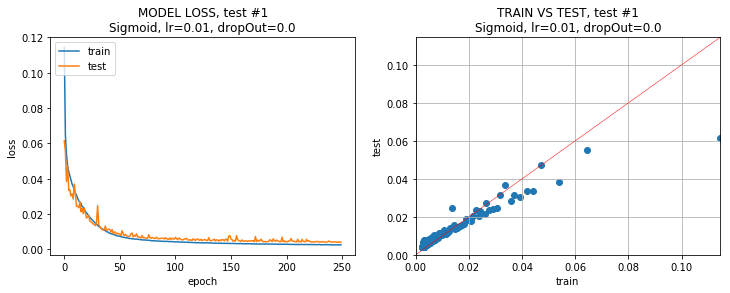

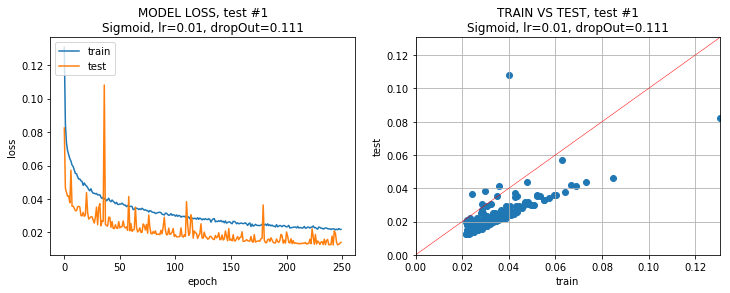

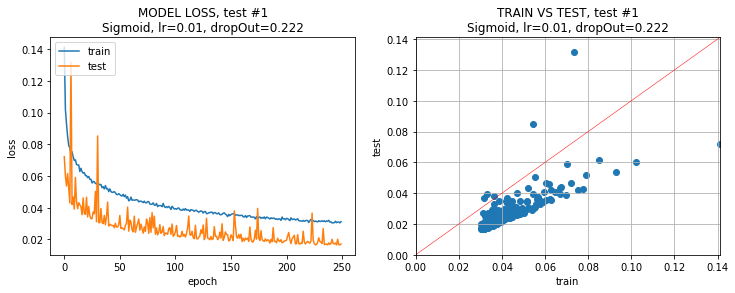

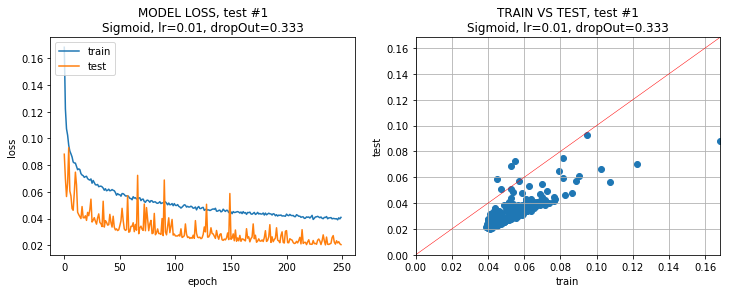

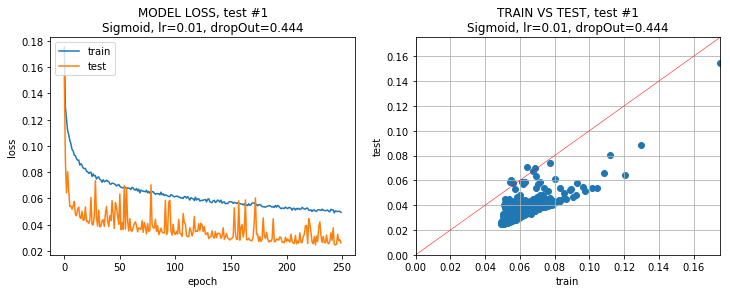

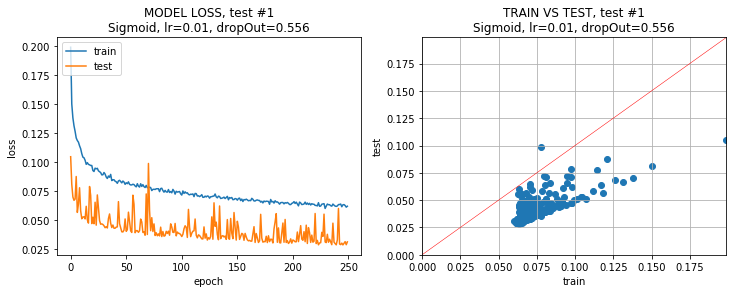

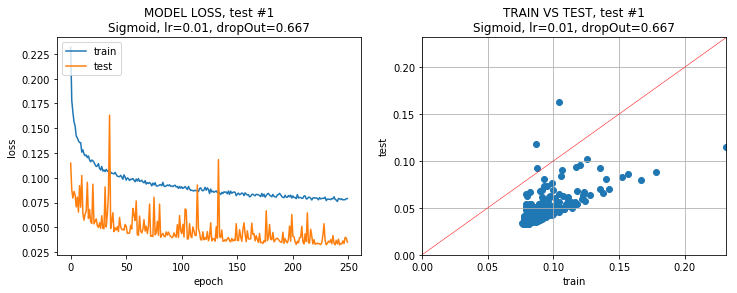

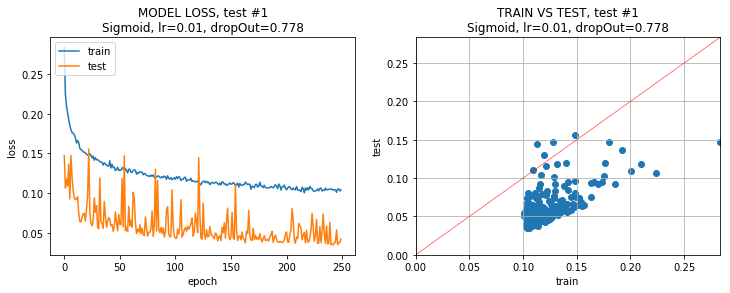

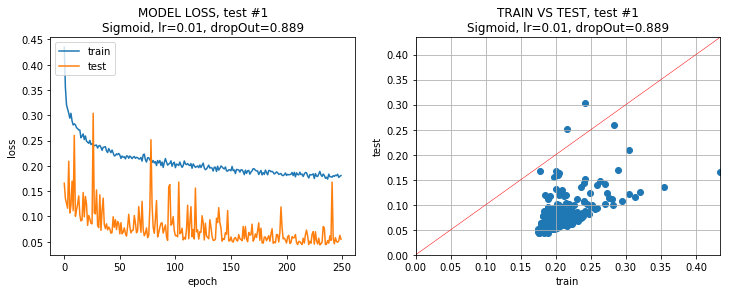

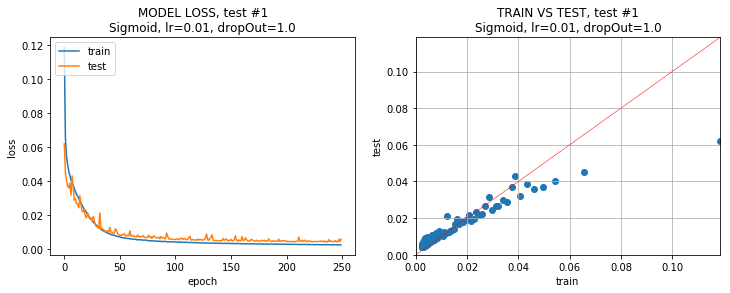

In [47]:
run_model(subtitle='lr=0.01, (reference)')
for p in params:
    run_model(var_dropout=p, subtitle='lr=0.01, dropOut='+str(round(p,3)))


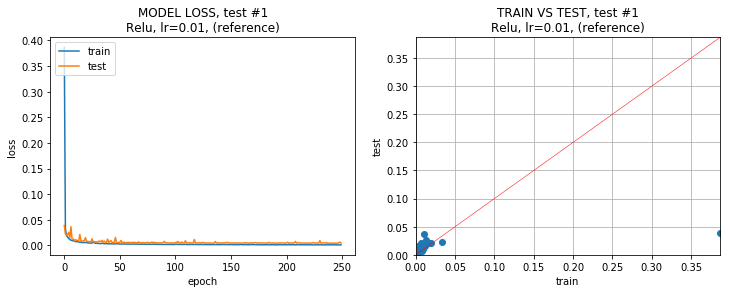

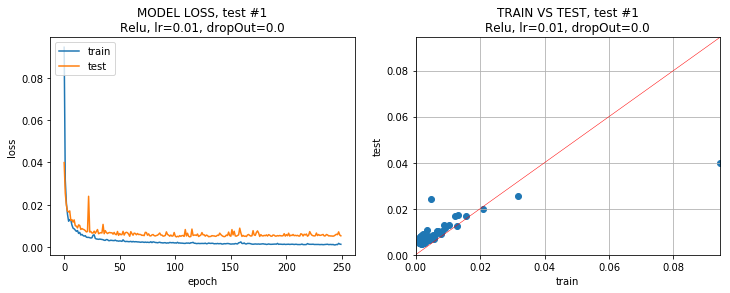

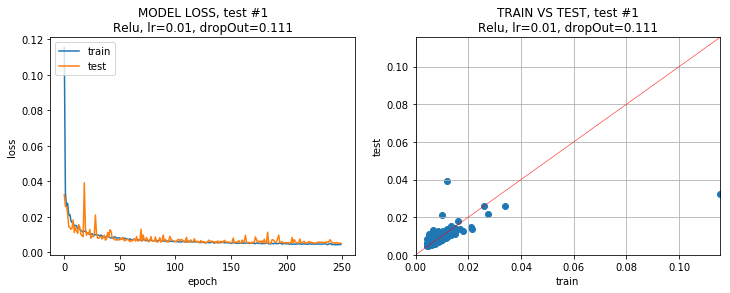

Estadística NULA para lr=0.01, dropOut=0.222(relu,0)
Estadística NULA para lr=0.01, dropOut=0.333(relu,0)
Estadística NULA para lr=0.01, dropOut=0.444(relu,0)
Estadística NULA para lr=0.01, dropOut=0.556(relu,0)
Estadística NULA para lr=0.01, dropOut=0.667(relu,0)
Estadística NULA para lr=0.01, dropOut=0.778(relu,0)
Estadística NULA para lr=0.01, dropOut=0.889(relu,0)


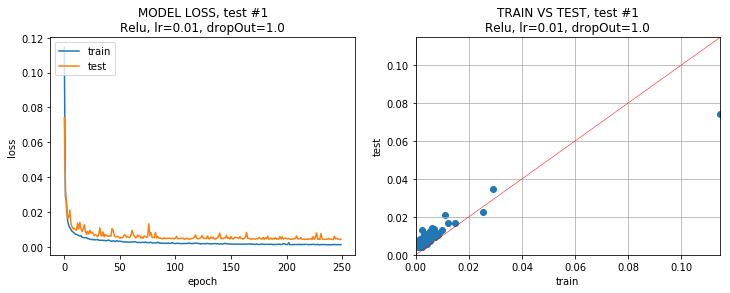

In [48]:
run_model(var_activation='relu',subtitle='lr=0.01, (reference)')
for p in params: 
    run_model(var_activation='relu' ,var_dropout=p, subtitle='lr=0.01, dropOut='+str(round(p,3)))

j. Pruebas con k-folds

En terminos generales, la red mostro una menor calidad en la convergencia al utilizar distintos valores de KFold.

In [18]:
from sklearn.model_selection import KFold

In [19]:
Xm = X_train_scaled.values
ym = y_train_scaled

In [20]:
kfold = KFold(10)

975/975 [==============================] - 0s 13us/step


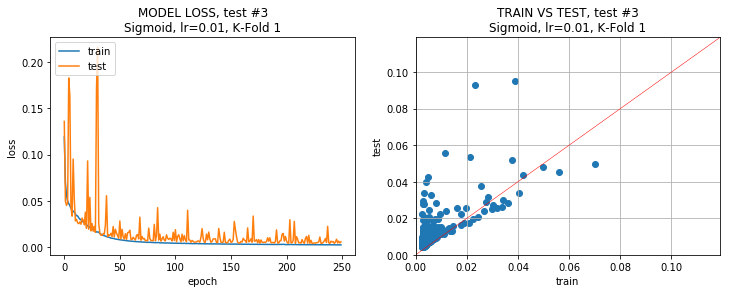

Estadística NULA para lr=0.01, K-Fold 1(relu,3)
975/975 [==============================] - 0s 12us/step


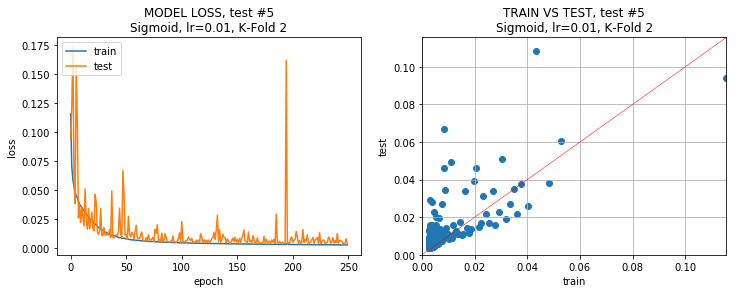

975/975 [==============================] - 0s 12us/step


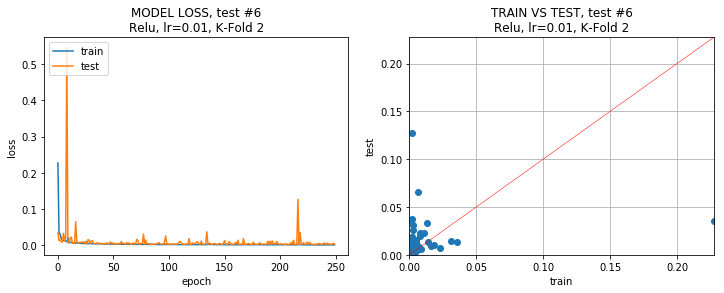

975/975 [==============================] - 0s 12us/step


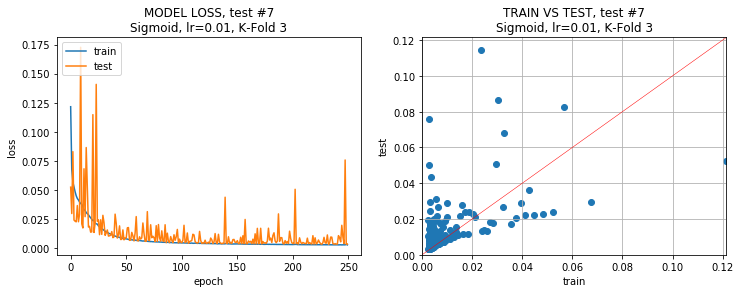

975/975 [==============================] - 0s 13us/step


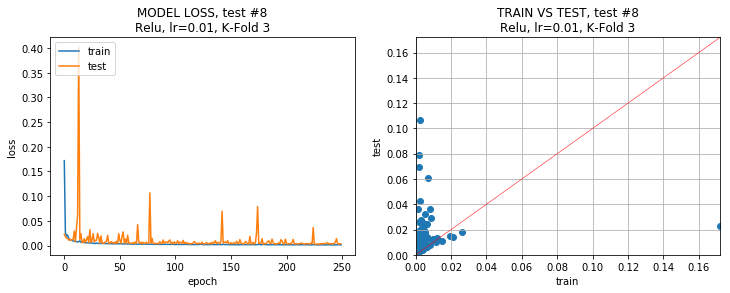

975/975 [==============================] - 0s 12us/step


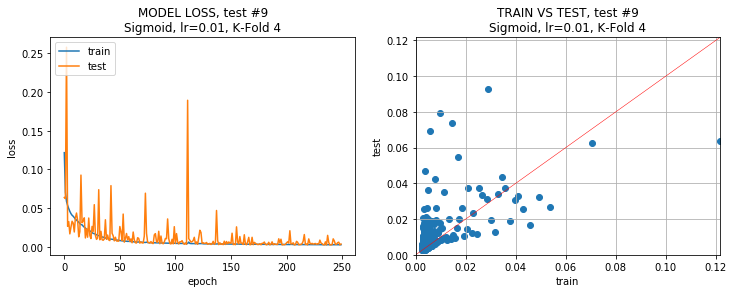

975/975 [==============================] - 0s 12us/step


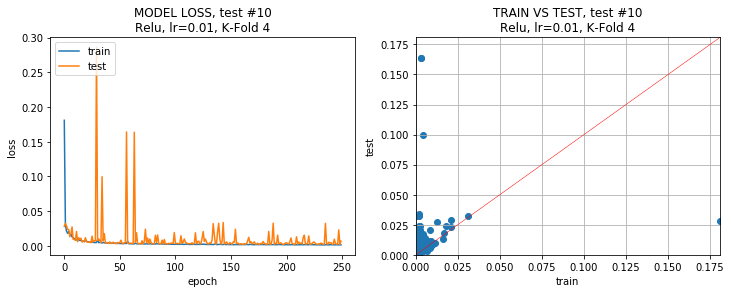

975/975 [==============================] - 0s 13us/step


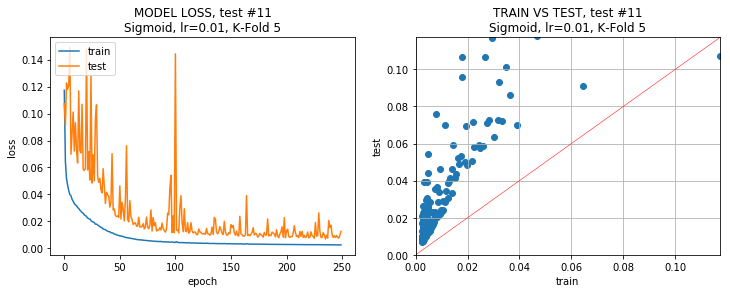

975/975 [==============================] - 0s 13us/step


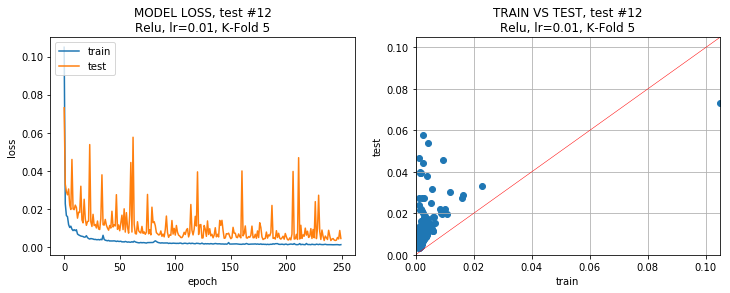

974/974 [==============================] - 0s 13us/step


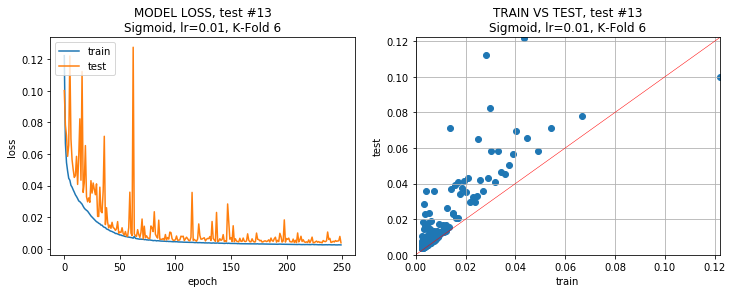

Estadística NULA para lr=0.01, K-Fold 6(relu,13)
974/974 [==============================] - 0s 13us/step


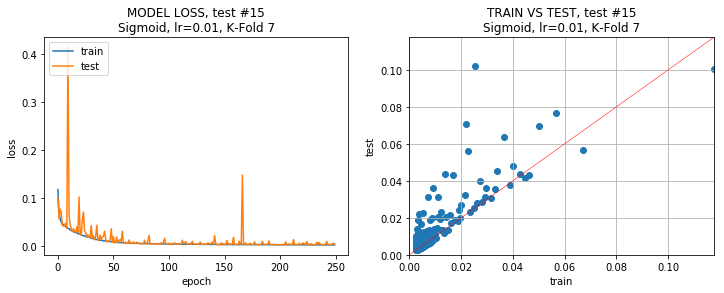

974/974 [==============================] - 0s 14us/step


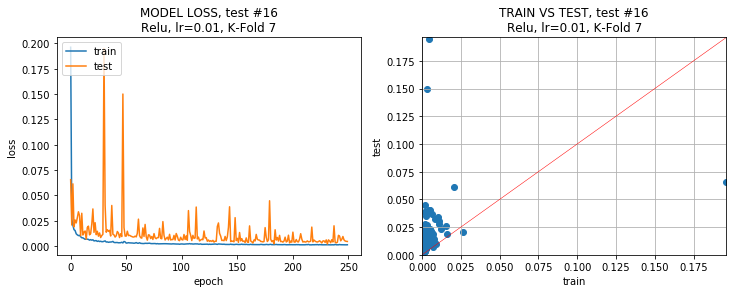

974/974 [==============================] - 0s 14us/step


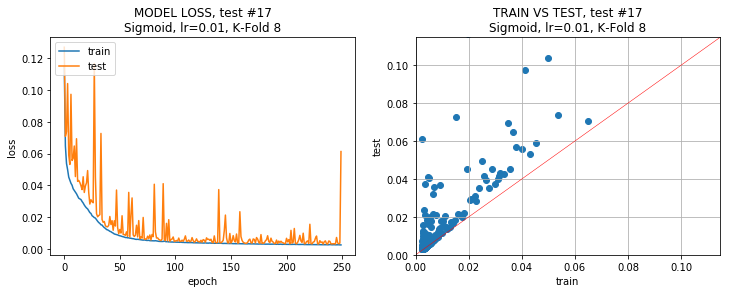

Estadística NULA para lr=0.01, K-Fold 8(relu,17)
974/974 [==============================] - 0s 16us/step


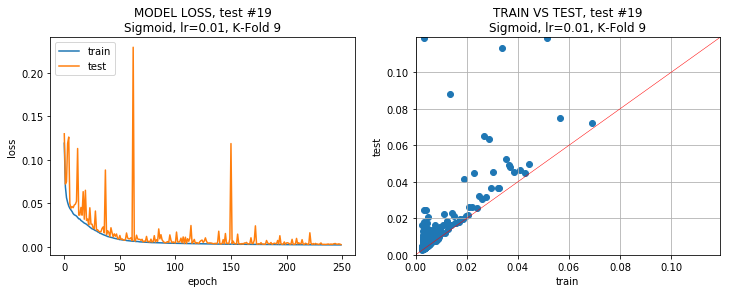

Estadística NULA para lr=0.01, K-Fold 9(relu,19)
974/974 [==============================] - 0s 15us/step


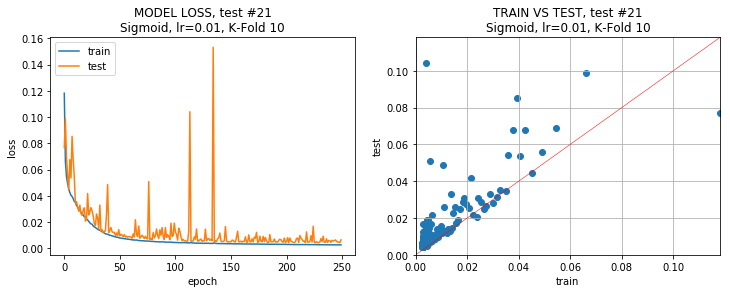

974/974 [==============================] - 0s 15us/step


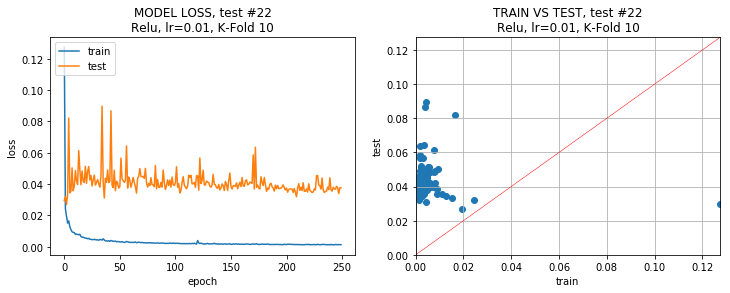

In [21]:
iter = 1
for train, val in kfold.split(Xm):
    run_model(
        Xm_train=Xm[train],
        ym_train=ym[train],
        Xm_val=Xm[val],
        ym_val=ym[val],
        subtitle='lr=0.01, K-Fold ' + str(iter))
    run_model(
        var_activation='relu',
        Xm_train=Xm[train],
        ym_train=ym[train],
        Xm_val=Xm[val],
        ym_val=ym[val],
        subtitle='lr=0.01, K-Fold ' + str(iter))
    iter = iter + 1

In [22]:
mse_cv = np.mean(cvscores)

In [23]:
print(mse_cv)

0.010482765678648122
